In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [683]:
df = pd.read_excel(r"C:\Users\malli\Personal_Projects\Retail_Supply_Chain_Sales\Data_sets\Retail-Supply-Chain-Sales-Dataset.xlsx")

In [3]:
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-12-06 2016-12-06    Second Class    DV-13045   
3       4  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   
4       5  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Retail Sales People       Product ID         Category Sub-Category  \
0   Cassandra Brandow  FUR-BO-10001798        Furniture    Bookcases   
1   Cassandra Brandow  FUR-CH-10000454        Furniture       Chairs   
2       Anna Andreadi  OFF-LA-10000240  Office Supplies       Labels   
3   Cassandra Brandow  FUR-TA-10000577        Furniture       Tables   
4   Cassandra Brandow  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name Returned     Sales  \
0                  Bush Somerset Collection Bookcase      Not  261.9600   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...      Not  731.9400   
2  Self-Adhesive Address Labels for Typewriters b...      Not   14.6200   
3      Bretford CR4500 Series Slim Rectangular Table      Not  957.5775   
4                     Eldon Fold 'N Roll Cart System      Not   22.3680   

  Quantity Discount    Profit  
0        2     0.00   41.9136  
1        3     0.00  219.5820  
2        2     0.00    6.8714  
3        5     0.45 -383.0310  
4        2     0.20    2.5164  

[5 rows x 23 columns]

In [4]:
df.describe().T

count          mean           std       min          25%  \
Row ID       9994.0   4997.500000   2885.163629     1.000   2499.25000   
Postal Code  9994.0  55190.379428  32063.693350  1040.000  23223.00000   
Sales        9994.0    229.858001    623.245101     0.444     17.28000   
Quantity     9994.0      3.789574      2.225110     1.000      2.00000   
Discount     9994.0      0.156203      0.206452     0.000      0.00000   
Profit       9994.0     28.656896    234.260108 -6599.978      1.72875   

                    50%        75%        max  
Row ID        4997.5000   7495.750   9994.000  
Postal Code  56430.5000  90008.000  99301.000  
Sales           54.4900    209.940  22638.480  
Quantity         3.0000      5.000     14.000  
Discount         0.2000      0.200      0.800  
Profit           8.6665     29.364   8399.976

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Row ID               9994 non-null   int64         
 1   Order ID             9994 non-null   object        
 2   Order Date           9994 non-null   datetime64[ns]
 3   Ship Date            9994 non-null   datetime64[ns]
 4   Ship Mode            9994 non-null   object        
 5   Customer ID          9994 non-null   object        
 6   Customer Name        9994 non-null   object        
 7   Segment              9994 non-null   object        
 8   Country              9994 non-null   object        
 9   City                 9994 non-null   object        
 10  State                9994 non-null   object        
 11  Postal Code          9994 non-null   int64         
 12  Region               9994 non-null   object        
 13  Retail Sales People  9994 non-nul

In [6]:
df.sample(60)

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
8357    8358  CA-2014-110555 2014-11-04 2014-11-04  Standard Class   
9614    9615  CA-2014-128524 2014-11-11 2014-11-13     First Class   
315      316  CA-2014-167850 2014-09-08 2014-09-08  Standard Class   
6438    6439  US-2017-113992 2017-12-14 2017-12-19  Standard Class   
2094    2095  US-2015-164357 2015-11-25 2015-11-29  Standard Class   
822      823  CA-2017-101434 2017-06-20 2017-06-27  Standard Class   
1045    1046  CA-2017-152702 2017-12-10 2017-12-10  Standard Class   
156      157  CA-2015-118948 2015-05-28 2015-05-28  Standard Class   
3350    3351  CA-2016-147536 2016-12-26 2016-12-31  Standard Class   
4552    4553  US-2014-106334 2014-12-27 2015-02-01  Standard Class   
3370    3371  CA-2016-134887 2016-03-25 2016-03-25        Same Day   
118      119  US-2015-136476 2015-05-04 2015-10-04  Standard Class   
1786    1787  CA-2017-166317 2017-09-22 2017-09-26  Standard Class   
7216    7217  CA-2015-150770 2015-03-05 2015-06-05     First Class   
193      194  CA-2015-102281 2015-12-10 2015-12-10     First Class   
599      600  US-2016-100720 2016-07-16 2016-07-21  Standard Class   
6009    6010  CA-2015-135580 2015-12-30 2016-03-01  Standard Class   
8761    8762  CA-2016-159891 2016-01-31 2016-06-02  Standard Class   
2711    2712  CA-2017-132430 2017-09-10 2017-11-10     First Class   
7056    7057  CA-2016-165330 2016-11-12 2016-11-12        Same Day   
6843    6844  CA-2016-123946 2016-12-09 2016-12-09  Standard Class   
6913    6914  CA-2015-104115 2015-12-06 2015-12-06  Standard Class   
9442    9443  CA-2017-165904 2017-07-04 2017-11-04  Standard Class   
4456    4457  US-2015-146745 2015-03-09 2015-08-09  Standard Class   
643      644  CA-2017-106103 2017-10-06 2017-10-06  Standard Class   
3928    3929  CA-2016-162082 2016-03-14 2016-03-17     First Class   
76        77  US-2017-118038 2017-09-12 2017-11-12     First Class   
7918    7919  CA-2015-152513 2015-04-07 2015-08-07    Second Class   
6887    6888  CA-2017-120222 2017-04-25 2017-04-25  Standard Class   
3639    3640  CA-2016-145177 2016-10-11 2016-11-14  Standard Class   
3358    3359  CA-2016-139234 2016-06-05 2016-10-05  Standard Class   
1897    1898  CA-2014-169775 2014-08-29 2014-08-29    Second Class   
3487    3488  CA-2017-120705 2017-05-09 2017-11-09  Standard Class   
2747    2748  US-2015-165449 2015-11-22 2015-11-26  Standard Class   
3733    3734  CA-2015-109575 2015-09-18 2015-09-23  Standard Class   
8835    8836  US-2017-132675 2017-09-24 2017-09-28  Standard Class   
7201    7202  CA-2016-104276 2016-11-27 2016-11-27  Standard Class   
1710    1711  CA-2017-123491 2017-10-30 2017-10-30  Standard Class   
3401    3402  CA-2014-102274 2014-11-21 2014-11-26  Standard Class   
7424    7425  CA-2017-135069 2017-10-04 2017-10-04  Standard Class   
3176    3177  US-2017-132059 2017-09-23 2017-09-29  Standard Class   
4676    4677  CA-2014-114510 2014-03-14 2014-03-19  Standard Class   
1311    1312  CA-2016-141082 2016-09-12 2016-12-13  Standard Class   
9669    9670  CA-2017-145275 2017-02-04 2017-06-04  Standard Class   
9800    9801  CA-2015-128608 2015-12-01 2015-12-01  Standard Class   
9948    9949  CA-2017-121559 2017-01-06 2017-03-06    Second Class   
368      369  CA-2016-155516 2016-10-21 2016-10-21        Same Day   
7366    7367  CA-2016-127243 2016-11-28 2016-11-28  Standard Class   
1301    1302  CA-2016-137043 2016-12-23 2016-12-25    Second Class   
5751    5752  CA-2016-125850 2016-01-22 2016-01-28  Standard Class   
1239    1240  CA-2014-127012 2014-11-08 2014-11-08  Standard Class   
4742    4743  CA-2017-164364 2017-12-11 2017-12-11  Standard Class   
6214    6215  CA-2014-128538 2014-11-10 2014-11-10  Standard Class   
9130    9131  CA-2016-130911 2016-03-24 2016-03-26    Second Class   
5762    5763  CA-2017-158169 2017-12-08 2017-12-08     First Class   
9662    9663  CA-2016-160717 2016-06-06 2016-11-06  Standard Class   
7745    7746  CA

In [7]:
df = df.drop('Row ID', axis=1)

In [8]:
df.head()

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-12-06 2016-12-06    Second Class    DV-13045   
3  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   
4  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   ...  Retail Sales People       Product ID         Category Sub-Category  \
0  ...    Cassandra Brandow  FUR-BO-10001798        Furniture    Bookcases   
1  ...    Cassandra Brandow  FUR-CH-10000454        Furniture       Chairs   
2  ...        Anna Andreadi  OFF-LA-10000240  Office Supplies       Labels   
3  ...    Cassandra Brandow  FUR-TA-10000577        Furniture       Tables   
4  ...    Cassandra Brandow  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name Returned     Sales  \
0                  Bush Somerset Collection Bookcase      Not  261.9600   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...      Not  731.9400   
2  Self-Adhesive Address Labels for Typewriters b...      Not   14.6200   
3      Bretford CR4500 Series Slim Rectangular Table      Not  957.5775   
4                     Eldon Fold 'N Roll Cart System      Not   22.3680   

  Quantity  Discount    Profit  
0        2      0.00   41.9136  
1        3      0.00  219.5820  
2        2      0.00    6.8714  
3        5      0.45 -383.0310  
4        2      0.20    2.5164  

[5 rows x 22 columns]

In [9]:
df.to_csv("Retail_Supply_Chain_Sales_Dataset.csv")

In [10]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Retail Sales People', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Returned', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [11]:
type(df['Postal Code'])

pandas.core.series.Series

In [12]:
df['Postal Code']

0       42420
1       42420
2       90036
3       33311
4       33311
        ...  
9989    33180
9990    92627
9991    92627
9992    92627
9993    92683
Name: Postal Code, Length: 9994, dtype: int64

In [13]:
# # Importing all the data into mysql using python
# import pandas as pd
# import mysql.connector
# import os

# # List of CSV files and their corresponding table names
# csv_files = [
#     ('Retail_Supply_Chain_Sales_Dataset.csv', 'sales_data')  # Add the table name here
# ]

# # Connect to the MySQL database
# import pymysql

# conn = pymysql.connect(
#     host='localhost',
#     user='root',
#     password='new_password',
#     database='retail'
# )
# cursor = conn.cursor()

# # Folder containing the CSV files
# folder_path = "C:/Users/malli/Personal_Projects/Retail_Supply_Chain_Sales"

# def get_sql_type(dtype):
#     if pd.api.types.is_integer_dtype(dtype):
#         return 'INT'
#     elif pd.api.types.is_float_dtype(dtype):
#         return 'FLOAT'
#     elif pd.api.types.is_bool_dtype(dtype):
#         return 'BOOLEAN'
#     elif pd.api.types.is_datetime64_any_dtype(dtype):
#         return 'DATETIME'
#     else:
#         return 'TEXT'

# for csv_file, table_name in csv_files:
#     file_path = os.path.join(folder_path, csv_file)
    
#     # Read the CSV file into a pandas DataFrame
#     df = pd.read_csv(file_path)
    
#     # Replace NaN with None to handle SQL NULL
#     df = df.where(pd.notnull(df), None)
    
#     # Debugging: Check for NaN values
#     print(f"Processing {csv_file}")
#     print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

#     # Clean column names
#     df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

#     # Generate the CREATE TABLE statement with appropriate data types
#     columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
#     create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
#     cursor.execute(create_table_query)

#     # Insert DataFrame data into the MySQL table
#     for _, row in df.iterrows():
#         # Convert row to tuple and handle NaN/None explicitly
#         values = tuple(None if pd.isna(x) else x for x in row)
#         sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
#         cursor.execute(sql, values)

#     # Commit the transaction for the current CSV file
#     conn.commit()

# # Close the connection
# conn.close()


In [14]:
# import pymysql

# # Connect to the MySQL database
# conn = pymysql.connect(
#     host='localhost',
#     user='root',
#     password='new_password',
#     database='retail'
# )
# cursor = conn.cursor()

# # Correctly escape the column name
# drop_column_query = "ALTER TABLE sales_data DROP COLUMN `Unnamed:_0`;"
# cursor.execute(drop_column_query)

# # Commit the changes and close the connection
# conn.commit()
# conn.close()

# print("Column dropped successfully!")


In [15]:
df.sample(5)

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
1854  CA-2015-160472 2015-07-20 2015-07-25    Second Class    RK-19300   
962   CA-2016-120859 2016-01-09 2016-04-09     First Class    CV-12805   
1123  US-2014-147627 2014-01-20 2014-01-26  Standard Class    HL-15040   
2533  CA-2014-111500 2014-08-17 2014-08-21  Standard Class    DJ-13510   
7260  CA-2016-152730 2016-05-30 2016-05-30  Standard Class    EM-14140   

      Customer Name      Segment        Country           City       State  \
1854  Ralph Kennedy     Consumer  United States     South Bend     Indiana   
962   Cynthia Voltz    Corporate  United States  San Francisco  California   
1123   Hunter Lopez     Consumer  United States      Jonesboro    Arkansas   
2533      Don Jones    Corporate  United States    Little Rock    Arkansas   
7260   Eugene Moren  Home Office  United States       Superior   Wisconsin   

      ...  Retail Sales People       Product ID         Category Sub-Category  \
1854  ...       Kelly Williams  OFF-ST-10003442  Office Supplies      Storage   
962   ...        Anna Andreadi  OFF-EN-10001335  Office Supplies    Envelopes   
1123  ...    Cassandra Brandow  FUR-FU-10003194        Furniture  Furnishings   
2533  ...    Cassandra Brandow  TEC-AC-10000844       Technology  Accessories   
7260  ...       Kelly Williams  TEC-PH-10000441       Technology       Phones   

                                           Product Name Returned   Sales  \
1854                      Eldon Portable Mobile Manager      Not  141.40   
962   White Business Envelopes with Contemporary Sea...      Not   21.88   
1123  Eldon Expressions Desk Accessory, Wood Pencil ...      Not   38.60   
2533                   Logitech Gaming G510s - Keyboard      Not  339.96   
7260                                       VTech DS6151      Not  125.99   

     Quantity  Discount    Profit  
1854        5       0.0   38.1780  
962         2       0.0   10.9400  
1123        4       0.0   11.5800  
2533        4       0.0  122.3856  
7260        1       0.0   35.2772  

[5 rows x 22 columns]

## Basic
### 1. Create a scatter plot to visualize the relationship between 'Retail Sales' and 'Discount'.

In [828]:
# plt.figure(figsize=(14,6))
# sns.scatterplot(y = df['Sales'], x = df['Discount'], color='blue', alpha=0.6)
# plt.title=('Relationship Between Sales and Discount')
# plt.xlabel=('Discount')
# plt.ylabel=('Sales')
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.show()

fig = px.scatter(x = df['Discount'], y = df['Sales'], color=df['Sales'], template='plotly_white',
                    labels={'x':'Discount', 'y': 'Sales $'})

fig.update_layout(
    title = 'Relationship Between Sales and Discount',
    xaxis_title = 'Discount',
    yaxis_title = 'Sales')

fig.show()

### 2. Calculate the average 'Profit' for each 'Category' and visualize it using a bar chart.

In [17]:
category_profit = df.groupby('Category')['Profit'].mean().reset_index()
category_profit = category_profit.sort_values(by = 'Profit', ascending=False).reset_index()
category_profit = category_profit.drop('index',axis=1)
category_profit

Category     Profit
0       Technology  78.752002
1  Office Supplies  20.327050
2        Furniture   8.699327

In [821]:
# plt.figure(figsize = (12,6))
# sns.barplot(x= category_profit['Category'], y = category_profit['Profit'], palette='viridis')
# plt.title = ('Average Profit by Category')
# plt.xlabel=('Average Profit')
# plt.ylabel=('Category')
# plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.show()

fig = px.bar(x = category_profit['Category'], y = category_profit['Profit'], color=category_profit['Category'], 
             template='plotly_white', labels={'x': 'Category', 'y':'Average Profit ($)'})

fig.update_layout(
        title = 'Average Profit by Category',
        yaxis_title = 'Average Profit',
        xaxis_title = 'Category')

fig.show()

###    3. Clean the 'Customer Name' column by removing any leading/trailing spaces and converting all names to lowercase. 


In [19]:
# Method 1:
Customer_name = []
for i in df['Customer Name']:
    cleaned_name = i.lower().strip()
    Customer_name.append(cleaned_name)
Customer_name

['claire gute',
 'claire gute',
 'darrin van huff',
 "sean o'donnell",
 "sean o'donnell",
 'brosina hoffman',
 'brosina hoffman',
 'brosina hoffman',
 'brosina hoffman',
 'brosina hoffman',
 'brosina hoffman',
 'brosina hoffman',
 'andrew allen',
 'irene maddox',
 'harold pawlan',
 'harold pawlan',
 'pete kriz',
 'alejandro grove',
 'zuschuss donatelli',
 'zuschuss donatelli',
 'zuschuss donatelli',
 'ken black',
 'ken black',
 'sandra flanagan',
 'emily burns',
 'eric hoffmann',
 'eric hoffmann',
 'tracy blumstein',
 'tracy blumstein',
 'tracy blumstein',
 'tracy blumstein',
 'tracy blumstein',
 'tracy blumstein',
 'tracy blumstein',
 'matt abelman',
 'gene hale',
 'gene hale',
 'steve nguyen',
 'steve nguyen',
 'steve nguyen',
 'steve nguyen',
 'linda cazamias',
 'ruben ausman',
 'erin smith',
 'odella nelson',
 'odella nelson',
 "patrick o'donnell",
 'lena hernandez',
 'lena hernandez',
 'darren powers',
 'darren powers',
 'darren powers',
 'darren powers',
 'janet molinari',
 'jane

In [20]:
# Method 2
Customer_name = df['Customer Name'].str.lower().str.strip()
Customer_name

0            claire gute
1            claire gute
2        darrin van huff
3         sean o'donnell
4         sean o'donnell
              ...       
9989    tom boeckenhauer
9990         dave brooks
9991         dave brooks
9992         dave brooks
9993        chris cortes
Name: Customer Name, Length: 9994, dtype: object

###     4. Create a function to calculate the 'Customer Lifetime Value' based on order history. 


In [21]:
def calculate_ltv(df):
    ltv_df = df.groupby(['Customer ID','Customer Name'], as_index =False).agg(LTV_Value = ('Sales', 'sum'),
                                                                              Total_Orders = ('Order ID', 'count'))
    ltv_df = ltv_df.sort_values(by = 'LTV_Value', ascending = False)
    return ltv_df
calculate_ltv(df)

Customer ID    Customer Name  LTV_Value  Total_Orders
700    SM-20320      Sean Miller  25043.050            15
741    TC-20980     Tamara Chand  19052.218            12
621    RB-19360     Raymond Buch  15117.339            18
730    TA-21385     Tom Ashbrook  14595.620            10
6      AB-10105    Adrian Barton  14473.571            20
..          ...              ...        ...           ...
659    RS-19870       Roy Skaria     22.328             3
508    MG-18205  Mitch Gastineau     16.739             2
145    CJ-11875     Carl Jackson     16.520             1
456    LD-16855     Lela Donovan      5.304             1
760    TS-21085    Thais Sissman      4.833             2

[793 rows x 4 columns]

###     5. Create a histogram to visualize the distribution of order quantities. 


In [815]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(12,6))
# sns.histplot(df['Quantity'], kde= True, palette='viridis')
# plt.title = 'Histogram of order quantity distribution'
# plt.xlabel = 'Order Quantity'
# plt.ylabel = 'Order Count'
# plt.show()

fig = px.histogram(df, x = 'Quantity', nbins = 30, color = 'Quantity', marginal='violin')

fig.update_layout(
            title = 'Histogram of order quantity distribution',
            xaxis_title = 'Order Quantity',
            yaxis_title = 'Order Count')

fig.show()

##   6. **Calculate the percentage of orders that were shipped on the same day they were placed.**


In [23]:
same_day_shipped_count = df[df['Ship Date'] == df['Order Date']].shape[0]
same_day_shipped_count

2227

In [24]:
total_orders = df.shape[0]
total_orders

9994

In [25]:
same_day_shipped_percentage = round(same_day_shipped_count*100 / total_orders,2)
same_day_shipped_percentage

22.28

In [26]:
print(f"Total Orders: {total_orders}")
print(f"Same-Day Shipped Orders: {same_day_shipped_count}")
print(f"Same-Day Shipped Orders Percentage: {same_day_shipped_percentage:}%")

Total Orders: 9994
Same-Day Shipped Orders: 2227
Same-Day Shipped Orders Percentage: 22.28%


## Intermediate
###    1. Perform exploratory data analysis on the 'Order Date' column to identify any trends or seasonality in order volume. 


In [779]:
df.dtypes

Order ID                         object
Order Date               datetime64[ns]
Ship Date                datetime64[ns]
Ship Mode                        object
Customer ID                      object
Customer Name                    object
Segment                          object
Country                          object
City                             object
State                            object
Postal Code                       int64
Region                           object
Retail Sales People              object
Product ID                       object
Category                         object
Sub-Category                     object
Product Name                     object
Returned                         object
Sales                           float64
Quantity                          int64
Discount                        float64
Profit                          float64
Order_Processing_Time             int64
Total_Discount                  float64
Profit_Margin                   float64


In [780]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

In [781]:
monthly_orders = df.groupby(['Year', 'Month']).size().reset_index(name='Order_Count')
monthly_orders

Year  Month  Order_Count
0   2014      1          131
1   2014      2           86
2   2014      3          168
3   2014      4          121
4   2014      5          148
5   2014      6          137
6   2014      7          156
7   2014      8          150
8   2014      9          239
9   2014     10          145
10  2014     11          263
11  2014     12          249
12  2015      1           86
13  2015      2          102
14  2015      3          154
15  2015      4          159
16  2015      5          177
17  2015      6          152
18  2015      7          132
19  2015      8          178
20  2015      9          278
21  2015     10          155
22  2015     11          282
23  2015     12          247
24  2016      1          154
25  2016      2          126
26  2016      3          193
27  2016      4          188
28  2016      5          260
29  2016      6          189
30  2016      7          208
31  2016      8          237
32  2016      9          236
33  2016     10          236
34  2016     11          293
35  2016     12          267
36  2017      1          226
37  2017      2          234
38  2017      3          304
39  2017      4          229
40  2017      5          241
41  2017      6          229
42  2017      7          244
43  2017      8          251
44  2017      9          385
45  2017     10          272
46  2017     11          375
47  2017     12          322

In [792]:
# Monthly orders trend
# plt.figure(figsize=(12, 6))
# sns.lineplot(x=pd.to_datetime(monthly_orders[['Year', 'Month']].assign(Day=1)), 
#              y=monthly_orders['Order_Count'], marker='o')
# plt.title=('Monthly Order Volume Trend')
# plt.xlabel=('Month-Year')
# plt.ylabel=('Order Count')
# plt.xticks(rotation=45)
# plt.grid()
# plt.show()

fig = px.line(x= pd.to_datetime(monthly_orders[['Year', 'Month']].assign(Day=1)), y = monthly_orders['Order_Count'],
             markers = 'o',labels = {'x':' Month-Year', 'y': ' Order Count'})

fig.update_layout(title = 'Monthly Order Volume Trend',
                 xaxis_title = 'Month-Year', yaxis_title = 'Order Count', template = 'plotly_white')

fig.show()

In [31]:
# Monthly orders seasonality
monthly_seasonality = df.groupby('Month').size().reset_index(name='Order_Count')
monthly_seasonality

Month  Order_Count
0       1          597
1       2          548
2       3          819
3       4          697
4       5          826
5       6          707
6       7          740
7       8          816
8       9         1138
9      10          808
10     11         1213
11     12         1085

In [772]:
# plt.figure(figsize=(12, 6))
# sns.barplot(x=monthly_seasonality['Month'], y=monthly_seasonality['Order_Count'], palette='viridis')
# plt.title=('Seasonality: Orders by Month')
# plt.xlabel=('Month')
# plt.ylabel=('Order Count')
# plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
#                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# plt.show()

fig = px.bar(data_frame=monthly_seasonality, x = 'Month', y = 'Order_Count', color='Order_Count',
            color_continuous_scale='viridis', labels = {'Month':'Month', 'Order_Count': 'Order Count'})

fig.update_layout(
    title = 'Orders By Monthly Seasonality',
    xaxis = dict(
                tickmode = 'array',
                tickvals = list(range(1,13)),
                ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']))

fig.show()

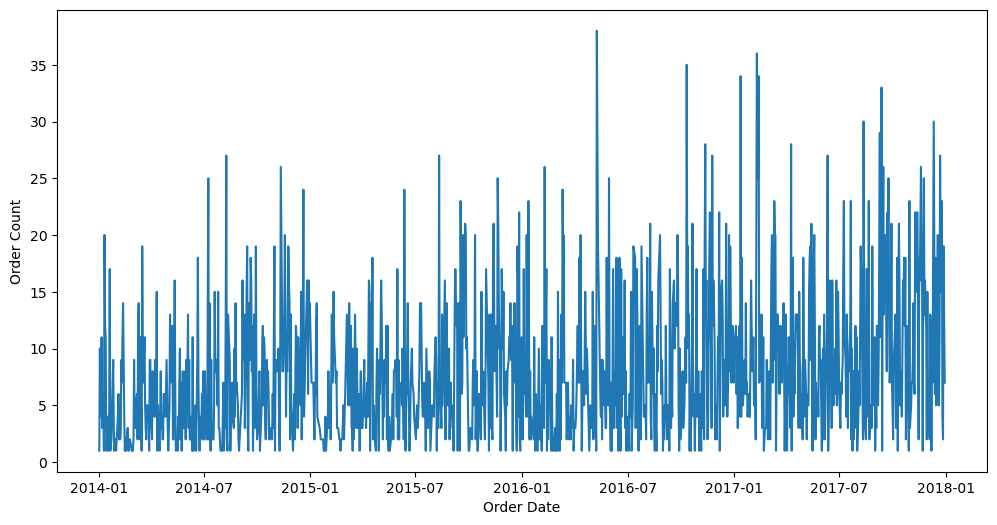

In [45]:
daily_orders = df.groupby('Order Date').size().reset_index(name='Order Count')
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_orders, x='Order Date', y = 'Order Count')
plt.show()

In [46]:
# Checking for missing dates
full_date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
missing_dates = full_date_range.difference(df.index)
missing_dates

DatetimeIndex(['1970-01-01'], dtype='datetime64[ns]', freq='D')

In [47]:
df['Order Date'].sort_values(), df['Order Date']

(540    2014-01-02
 6547   2014-01-03
 7948   2014-01-03
 7949   2014-01-03
 5713   2014-01-03
           ...    
 907    2017-12-30
 5091   2017-12-30
 1297   2017-12-30
 906    2017-12-30
 1296   2017-12-30
 Name: Order Date, Length: 9994, dtype: datetime64[ns],
 0      2016-08-11
 1      2016-08-11
 2      2016-12-06
 3      2015-11-10
 4      2015-11-10
           ...    
 9989   2014-01-21
 9990   2017-02-26
 9991   2017-02-26
 9992   2017-02-26
 9993   2017-04-05
 Name: Order Date, Length: 9994, dtype: datetime64[ns])

In [48]:
specific_date = pd.to_datetime('1970-01-01')
specific_date in df['Order Date']

False

In [49]:
daily_orders

Order Date  Order Count
0    2014-01-02            1
1    2014-01-03           10
2    2014-01-04            4
3    2014-01-06           11
4    2014-01-07            3
...         ...          ...
1232 2017-12-26            4
1233 2017-12-27            2
1234 2017-12-28           19
1235 2017-12-29           12
1236 2017-12-30            7

[1237 rows x 2 columns]

In [50]:
full_date_range = pd.date_range(start=daily_orders['Order Date'].min(), end=daily_orders['Order Date'].max(), freq='D')
missing_dates = full_date_range.difference(daily_orders['Order Date'])
missing_dates

DatetimeIndex(['2014-01-05', '2014-01-17', '2014-01-22', '2014-01-24',
               '2014-01-25', '2014-01-29', '2014-02-01', '2014-02-13',
               '2014-02-19', '2014-02-25',
               ...
               '2017-09-08', '2017-09-27', '2017-10-01', '2017-10-05',
               '2017-10-18', '2017-10-25', '2017-11-01', '2017-11-10',
               '2017-12-02', '2017-12-12'],
              dtype='datetime64[ns]', length=222, freq=None)

In [51]:
daily_orders['Order Date'] = pd.to_datetime(daily_orders['Order Date'])

# Set 'Order Date' as the index
daily_orders.set_index('Order Date', inplace=True)
full_date_range = pd.date_range(start=daily_orders.index.min(), end=daily_orders.index.max(), freq='D')

# Reindex the DataFrame to include all dates
daily_orders = daily_orders.reindex(full_date_range, fill_value=0)

# Reset the index and rename the index to 'Order Date'
daily_orders.reset_index(inplace=True)
daily_orders.rename(columns={'index': 'Order Date'}, inplace=True)

# Output the final DataFrame
print(daily_orders)

     Order Date  Order Count
0    2014-01-02            1
1    2014-01-03           10
2    2014-01-04            4
3    2014-01-05            0
4    2014-01-06           11
...         ...          ...
1454 2017-12-26            4
1455 2017-12-27            2
1456 2017-12-28           19
1457 2017-12-29           12
1458 2017-12-30            7

[1459 rows x 2 columns]


In [52]:
daily_orders

Order Date  Order Count
0    2014-01-02            1
1    2014-01-03           10
2    2014-01-04            4
3    2014-01-05            0
4    2014-01-06           11
...         ...          ...
1454 2017-12-26            4
1455 2017-12-27            2
1456 2017-12-28           19
1457 2017-12-29           12
1458 2017-12-30            7

[1459 rows x 2 columns]

In [53]:
full_date_range = pd.date_range(start=daily_orders['Order Date'].min(), end=daily_orders['Order Date'].max(), freq='D')
missing_dates = full_date_range.difference(daily_orders['Order Date'])
missing_dates

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

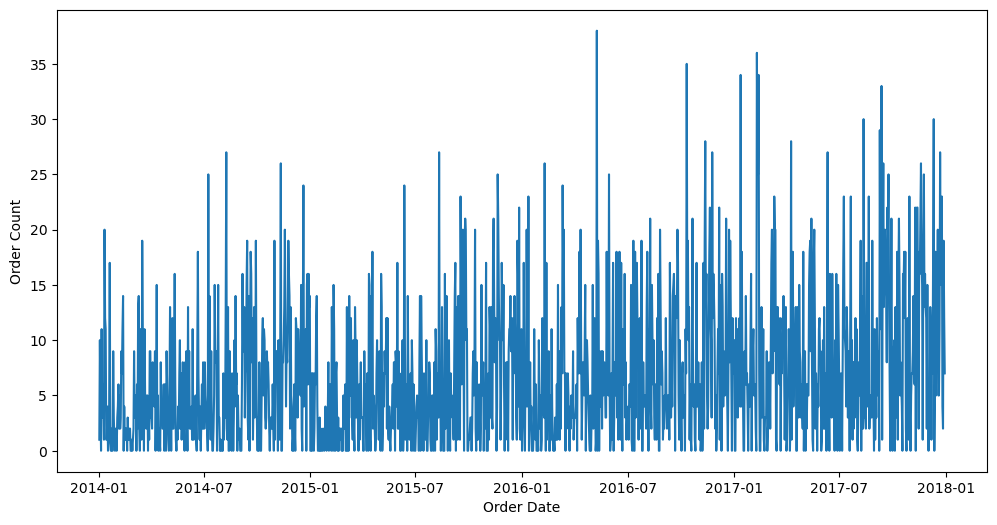

In [54]:
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_orders, x='Order Date', y = 'Order Count')
plt.show()

In [55]:
# Train Test Split
daily_orders.set_index('Order Date', inplace=True)
split_index = int(len(daily_orders)*0.8)
train_data = daily_orders.iloc[:split_index]
test_data = daily_orders.iloc[split_index:]
train_data, test_data

(            Order Count
 Order Date             
 2014-01-02            1
 2014-01-03           10
 2014-01-04            4
 2014-01-05            0
 2014-01-06           11
 ...                 ...
 2017-03-09           13
 2017-03-10            9
 2017-03-11           23
 2017-03-12           20
 2017-03-13           20
 
 [1167 rows x 1 columns],
             Order Count
 Order Date             
 2017-03-14            1
 2017-03-15            0
 2017-03-16           13
 2017-03-17           13
 2017-03-18           10
 ...                 ...
 2017-12-26            4
 2017-12-27            2
 2017-12-28           19
 2017-12-29           12
 2017-12-30            7
 
 [292 rows x 1 columns])

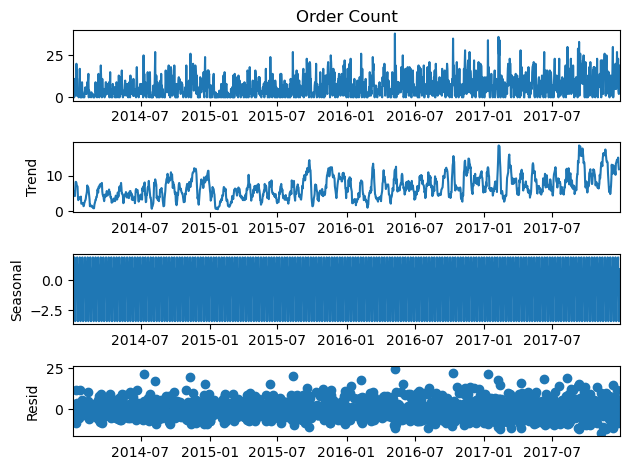

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(daily_orders['Order Count'])
decompose_ts_add.plot()
plt.show()

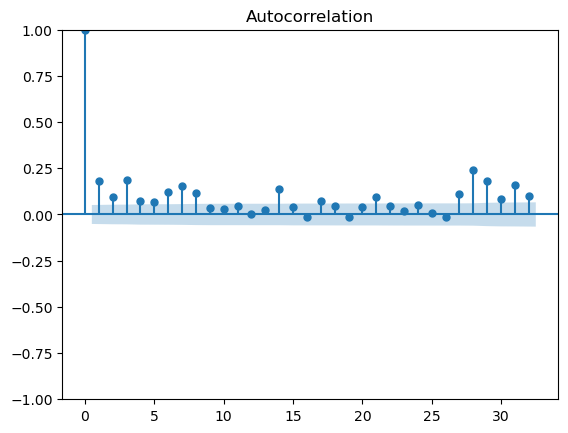

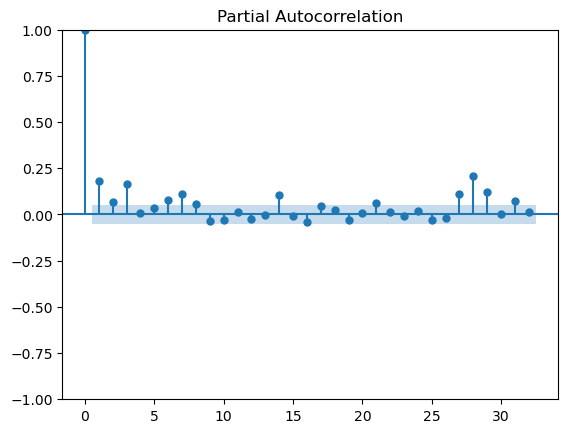

In [57]:
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(daily_orders['Order Count'].dropna(),)
plt.show()

plot_pacf(daily_orders['Order Count'].dropna(),)
plt.show()

In [58]:
from statsmodels.tsa.stattools import adfuller
# H0 = The data is not Stationary
# H1 = The data is Stationary
def adfuller_test(series):
    result = adfuller(series)
    labels = ["ADF test statistic", "P-value","#Lags used","No. of obsrvations used"]
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05 :
        print('Reject H0 Hypothesis (Accept H1(Alternate) Hypothesis)'+'\x1b[0;39;43m' +"The Data is Stationary"+ '\x1b[0m')
    else:
        print('Reject H1 Hypothesis (Accept H0(Null) Hypothesis)'+'\x1b[0;39;43m' +"The Data is Not-Stationary"+ '\x1b[0m')

adfuller_test(daily_orders)

ADF test statistic : -7.402798803984968
P-value : 7.478279146176668e-11
#Lags used : 13
No. of obsrvations used : 1445
Reject H0 Hypothesis (Accept H1(Alternate) Hypothesis)The Data is Stationary


In [59]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
arima_model = ARIMA(train_data['Order Count'], order=(6,0,4)).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Order Count   No. Observations:                 1167
Model:                 ARIMA(6, 0, 4)   Log Likelihood               -3714.116
Date:                Mon, 13 Jan 2025   AIC                           7452.232
Time:                        21:05:58   BIC                           7512.978
Sample:                    01-02-2014   HQIC                          7475.146
                         - 03-13-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2685      0.480     13.058      0.000       5.328       7.209
ar.L1          1.1620      0.089     12.992      0.000       0.987       1.337
ar.L2         -0.0464      0.067     -0.692      0.489      -0.178       0.085
ar.L3         -1.1381      0.061    -18.678      0.000      -1.258      -1.019
ar.L4          0.8696      0.091      9.608      0.000       0.692       1.047
ar.L5         -0.0274      0.043     -0.637      0.524      -0.112       0.057
ar.L6          0.0245      0.036      0.681      0.496      -0.046       0.095
ma.L1         -1.0393      0.088    -11.822      0.000      -1.212      -0.867
ma.L2         -0.0269      0.051     -0.524      0.600      -0.127       0.074
ma.L3          1.1636      0.042     27.812      0.000       1.082       1.246
ma.L4         -0.7739      0.080     -9.728      0.000      -0.930      -0.618
sigma2        34.4275      1.287     26.746      0.000      31.905      36.950
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               830.40
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.78   Skew:                             1.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

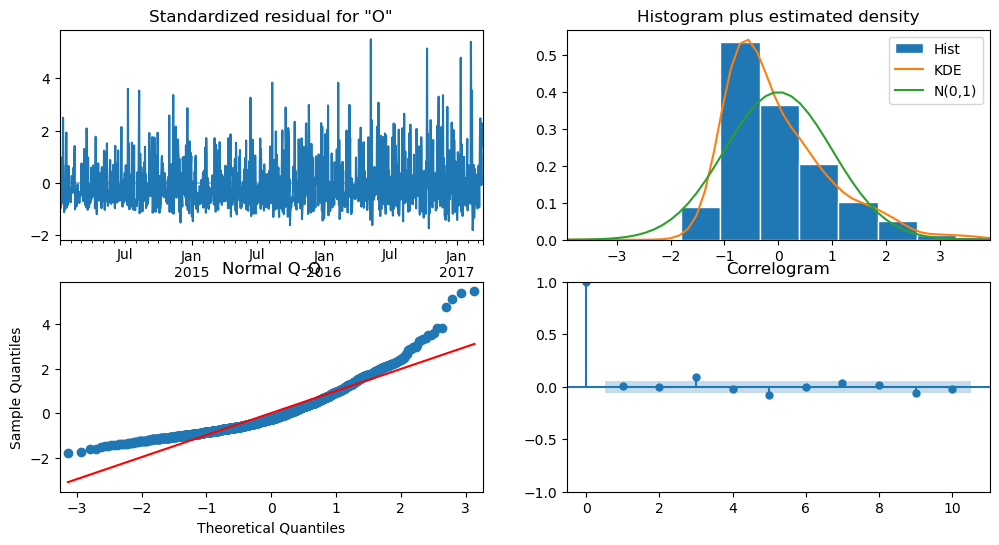

In [60]:
arima_model.plot_diagnostics(figsize = (12,6))
plt.show()

In [61]:
pred_start = test_data.index[0]
pred_end = test_data.index[-1]
print(pred_start)
print(pred_end)

2017-03-14 00:00:00
2017-12-30 00:00:00


In [62]:
arima_pred = arima_model.forecast(steps = len(test_data))
test_data['Predict_arima'] = arima_pred.values
test_data

Order Count  Predict_arima
Order Date                            
2017-03-14            1      10.033085
2017-03-15            0       8.155726
2017-03-16           13       9.400772
2017-03-17           13       9.741328
2017-03-18           10      11.244030
...                 ...            ...
2017-12-26            4       4.972940
2017-12-27            2       4.700879
2017-12-28           19       5.609853
2017-12-29           12       7.016475
2017-12-30            7       7.857271

[292 rows x 2 columns]

In [63]:
mae = mean_absolute_error(test_data['Order Count'], test_data['Predict_arima'])
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 5.837363070926674


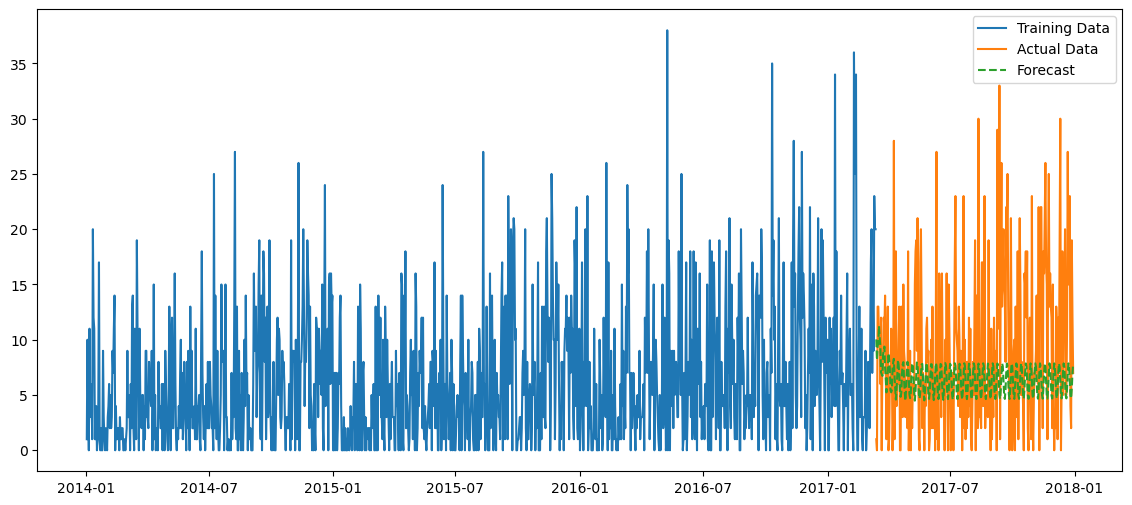

In [64]:
plt.figure(figsize=(14, 6))
plt.plot(train_data['Order Count'], label='Training Data')
plt.plot(test_data['Order Count'], label='Actual Data')
plt.plot(test_data['Predict_arima'], label='Forecast', linestyle='--')
plt.legend()
plt.show()

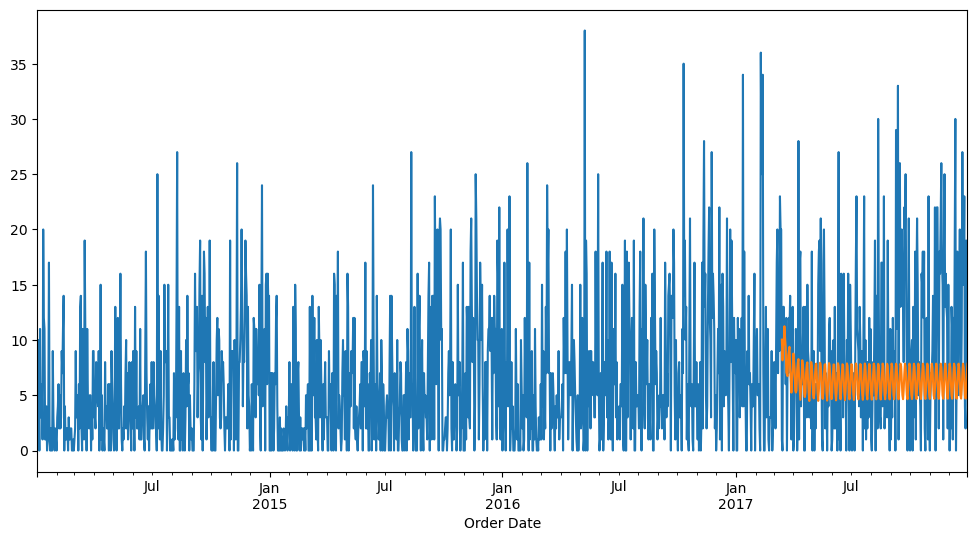

In [65]:
plt.figure(figsize=(12,6))
daily_orders['Order Count'].plot()
arima_pred.plot()
plt.show()

In [66]:
final_arima = ARIMA(daily_orders['Order Count'], order=(6,0,4)).fit()

In [67]:
forecast_arima = final_arima.predict(len(daily_orders), len(daily_orders)+int(input()))

60


<AxesSubplot:xlabel='Order Date'>

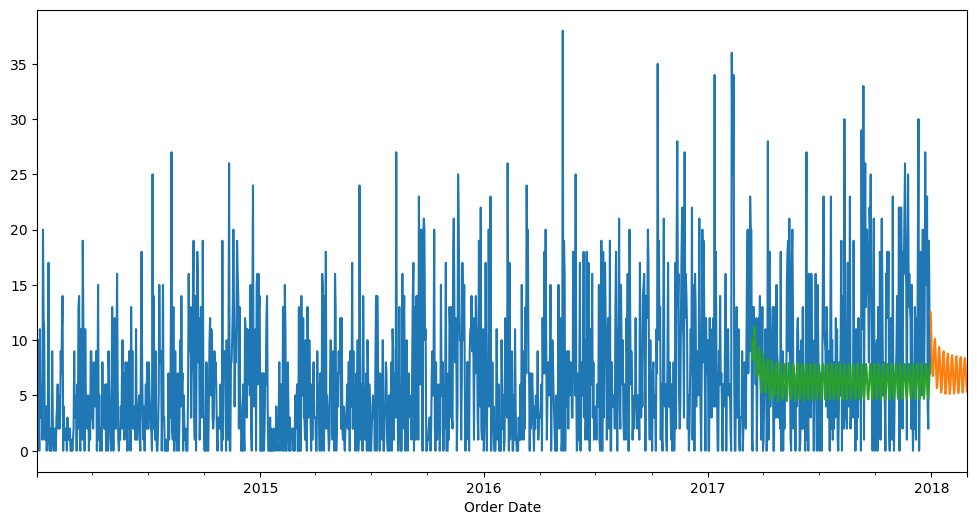

In [68]:
plt.figure(figsize=(12,6))
daily_orders['Order Count'].plot(label = 'Train')
forecast_arima.plot()
arima_pred.plot()

In [69]:
forecast_arima

2017-12-31    12.521682
2018-01-01    10.592374
2018-01-02     7.800766
2018-01-03     6.742814
2018-01-04     6.797967
                ...    
2018-02-25     8.389018
2018-02-26     7.468909
2018-02-27     6.107301
2018-02-28     5.331639
2018-03-01     5.717076
Freq: D, Name: predicted_mean, Length: 61, dtype: float64

## Seasonal ARIMA

In [93]:
import itertools
p_range = range(0, 3)  
d_range = range(0, 2)  
q_range = range(0, 3)  
P_range = range(0, 3)  
D_range = range(0, 2)  
Q_range = range(0, 3)  
s_range = [7, 13]  

def get_seasonal_combos( p_range, d_range, q_range, P_range, D_range, Q_range, s_range):
    non_seasonal_combo = list(itertools.product(p_range,d_range,q_range))
    seasonal_combo = list(itertools.product(P_range, D_range, Q_range, s_range))

    all_combo = [
        {"order": order, "seasonal_order": seasonal_order}
        for order in non_seasonal_combo
        for seasonal_order in seasonal_combo
    ]

    return (len(all_combo)),all_combo[:5]
get_seasonal_combos(p_range, d_range, q_range, P_range, D_range, Q_range, s_range)

(648,
 [{'order': (0, 0, 0), 'seasonal_order': (0, 0, 0, 7)},
  {'order': (0, 0, 0), 'seasonal_order': (0, 0, 0, 13)},
  {'order': (0, 0, 0), 'seasonal_order': (0, 0, 1, 7)},
  {'order': (0, 0, 0), 'seasonal_order': (0, 0, 1, 13)},
  {'order': (0, 0, 0), 'seasonal_order': (0, 0, 2, 7)}])

In [544]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from IPython.display import clear_output
import pandas as pd

def get_best_sarimax_models(ts, p_range, d_range, q_range, P_range, D_range, Q_range, s_range, num_models=5):
    """
    Finds the top SARIMA models based on AIC.
    
    Args:
        ts: Time series data.
        p_range, d_range, q_range: Ranges for non-seasonal parameters (p, d, q).
        P_range, D_range, Q_range: Ranges for seasonal parameters (P, D, Q).
        s_range: List of seasonal periods.
        num_models: Number of top models to return (default: 5).
    
    Returns:
        A sorted list of tuples containing (AIC, non-seasonal params, seasonal params).
    """
    models = []
    total_models = 0
    total_combinations = len(p_range) * len(d_range) * len(q_range) * len(P_range) * len(D_range) * len(Q_range) * len(s_range)
    
    for p in p_range:
        for d in d_range:
            for q in q_range:
                for P in P_range:
                    for D in D_range:
                        for Q in Q_range:
                            for s in s_range:
                                try:
                                    # Fit SARIMA model
                                    model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, s))
                                    results = model.fit(disp=False)
                                    
                                    # Append model details and AIC
                                    models.append((results.aic, (p, d, q), (P, D, Q, s)))
                                    
                                    # Update progress
                                    total_models += 1
                                    clear_output(wait=True)
                                    print(f"Evaluating model {total_models}/{total_combinations}...")
                                    print(f"Current Best AIC: {min(models, key=lambda x: x[0])[0]:.2f}")
                                except Exception as e:
                                    # Handle exceptions for models that fail
                                    total_models += 1
                                    clear_output(wait=True)
                                    print(f"Evaluating model {total_models}/{total_combinations}...")
                                    print(f"Error: {e}")
                                    continue
                                
    # Sort models by AIC and return top N
    models.sort(key=lambda x: x[0])
    return models[:num_models]

# Define parameter ranges
p_range = range(0, 3)
d_range = range(0, 2)
q_range = range(0, 3)
P_range = range(0, 3)
D_range = range(0, 2)
Q_range = range(0, 3)
s_range = [7, 13]

# # Find best SARIMA models
# top_models = get_best_sarimax_models(train_data['Order Count'], p_range, d_range, q_range, P_range, D_range, Q_range, s_range)

# # Display top models
# print("\nTop 5 SARIMA Models based on AIC:")
# for aic, non_seasonal, seasonal in top_models:
#     print(f"AIC: {aic:.2f}, non-seasonal: {non_seasonal}, seasonal: {seasonal}")


In [ ]:
# Top 5 SARIMA Models based on AIC:
# AIC: 14.00, non-seasonal: (1, 0, 1), seasonal: (2, 0, 2, 13)
# AIC: 7369.42, non-seasonal: (1, 0, 1), seasonal: (0, 1, 1, 7)
# AIC: 7370.63, non-seasonal: (1, 0, 2), seasonal: (0, 1, 1, 7)
# AIC: 7370.82, non-seasonal: (2, 0, 1), seasonal: (0, 1, 1, 7)
# AIC: 7371.41, non-seasonal: (1, 0, 1), seasonal: (0, 1, 2, 7)

In [60]:
# Best AIC: 7369.417065373588
# Best Parameters: (1, 0, 1, 0, 1, 1, 7)

In [92]:
sarima_model = SARIMAX(train_data['Order Count'], order=(1, 0, 1), seasonal_order=(0, 1, 2, 7)).fit()

In [93]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                            Order Count   No. Observations:                 1167
Model:             SARIMAX(1, 0, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -3680.703
Date:                                Mon, 13 Jan 2025   AIC                           7371.407
Time:                                        14:43:14   BIC                           7396.688
Sample:                                    01-02-2014   HQIC                          7380.946
                                         - 03-13-2017                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7556      0.082      9.177      0.000       0.594       0.917
ma.L1         -0.6240      0.095     -6.554      0.000      -0.811      -0.437
ma.S.L7       -0.9574      0.031    -31.234      0.000      -1.018      -0.897
ma.S.L14       0.0031      0.031      0.099      0.921      -0.058       0.064
sigma2        32.9074      0.881     37.349      0.000      31.181      34.634
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):               690.33
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               1.71   Skew:                             1.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

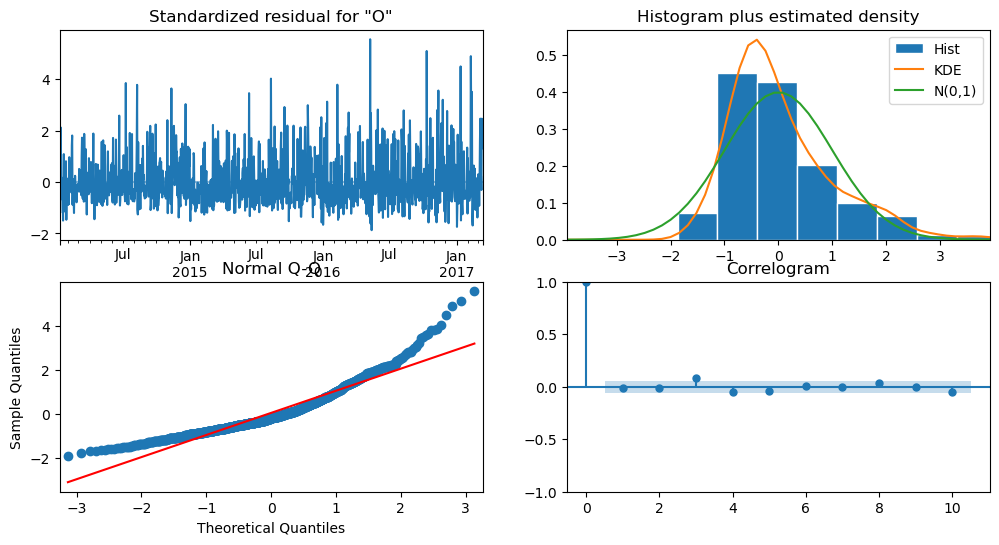

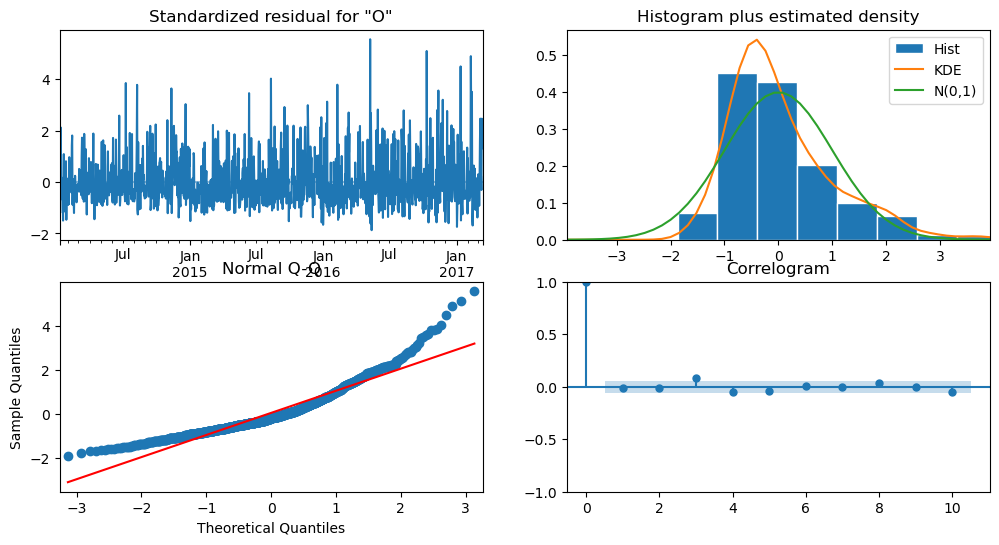

In [94]:
sarima_model.plot_diagnostics(figsize=(12,6))

In [95]:
sarima_pred = sarima_model.forecast(steps = len(test_data))
test_data['Predict_sarima'] = sarima_pred.values
test_data.head(60)

Order Count  Predict_arima  Predict_sarima
Order Date                                            
2017-03-14            1      10.033085        9.295609
2017-03-15            0       8.155726        5.661811
2017-03-16           13       9.400772       11.802850
2017-03-17           13       9.741328       10.558223
2017-03-18           10      11.244030        9.595544
2017-03-19           11      10.198299       11.120621
2017-03-20            6       9.416067       10.224126
2017-03-21           12       7.061345        6.665809
2017-03-22            0       6.879513        3.653022
2017-03-23            8       6.725402       10.285528
2017-03-24            7       8.619973        9.403778
2017-03-25           12       8.983702        8.769961
2017-03-26           11       9.381234       10.492814
2017-03-27           14       7.483345        9.759665
2017-03-28            8       6.492920        6.299665
2017-03-29            1       5.238146        3.376353
2017-03-30            6       6.368173       10.076469
2017-03-31           13       7.214234        9.245807
2017-04-01            0       8.773569        8.650594
2017-04-02            1       8.149701       10.402617
2017-04-03            6       7.382403        9.691509
2017-04-04            6       5.419023        6.248165
2017-04-05           11       5.243675        3.337438
2017-04-06            8       5.439642       10.047063
2017-04-07            0       7.298109        9.223587
2017-04-08            3       7.946516        8.633804
2017-04-09           28       8.273355       10.389930
2017-04-10            1       6.635053        9.681922
2017-04-11           17       5.584705        6.240921
2017-04-12           18       4.585849        3.331964
2017-04-13            4       5.650419       10.042927
2017-04-14            8       6.711407        9.220462
2017-04-15            6       8.171294        8.631442
2017-04-16           10       7.726950       10.388145
2017-04-17           13       6.862848        9.680574
2017-04-18            0       5.086811        6.239902
2017-04-19            0       4.835340        3.331194
2017-04-20           13       5.208453       10.042345
2017-04-21            8       6.971529        9.220022
2017-04-22            3       7.757486        8.631110
2017-04-23           15       7.973258       10.387894
2017-04-24            9       6.468812        9.680384
2017-04-25            8       5.332927        6.239758
2017-04-26            3       4.481451        3.331086
2017-04-27            6       5.466202       10.042263
2017-04-28            4       6.647778        9.219960
2017-04-29            2       8.002975        8.631063
2017-04-30           18       7.656026       10.387859
2017-05-01            0       6.697154        9.680357
2017-05-02            4       5.036294        6.239738
2017-05-03            9       4.715902        3.331070
2017-05-04            0       5.201970       10.042252
2017-05-05            6       6.880762        9.219952
2017-05-06            2       7.747127        8.631057
2017-05-07            6       7.866270       10.387854
2017-05-08            5       6.444678        9.680354
2017-05-09            5       5.239953        6.239735
2017-05-10           15       4.489623        3.331068
2017-05-11           18       5.412498       10.042250
2017-05-12           19       6.672505        9.219951

In [96]:
mae = mean_absolute_error(test_data['Order Count'], test_data['Predict_sarima'])
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 5.449433514158113


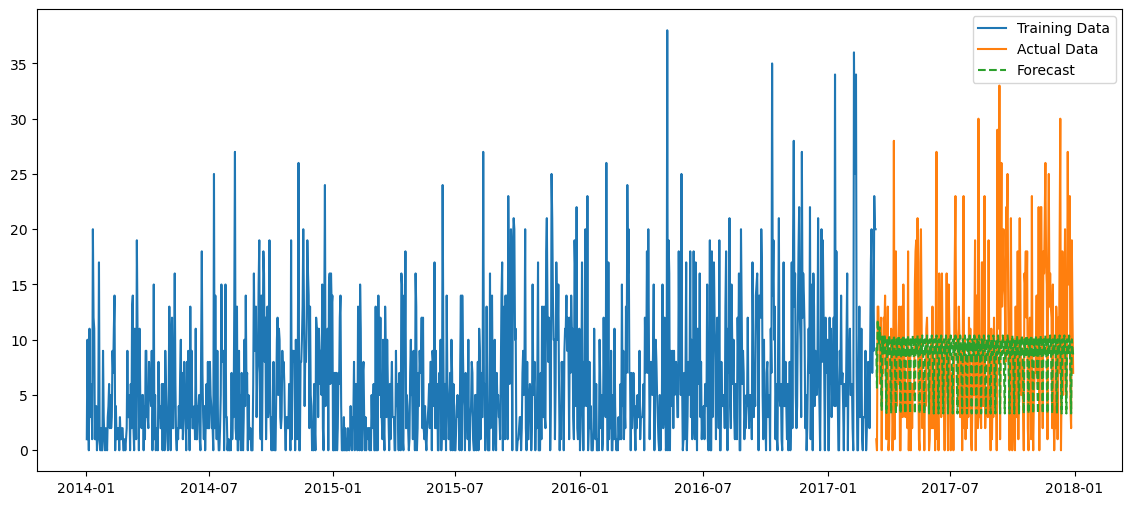

In [97]:
plt.figure(figsize=(14, 6))
plt.plot(train_data['Order Count'], label='Training Data')
plt.plot(test_data['Order Count'], label='Actual Data')
plt.plot(test_data['Predict_sarima'], label='Forecast', linestyle='--')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Order Date'>

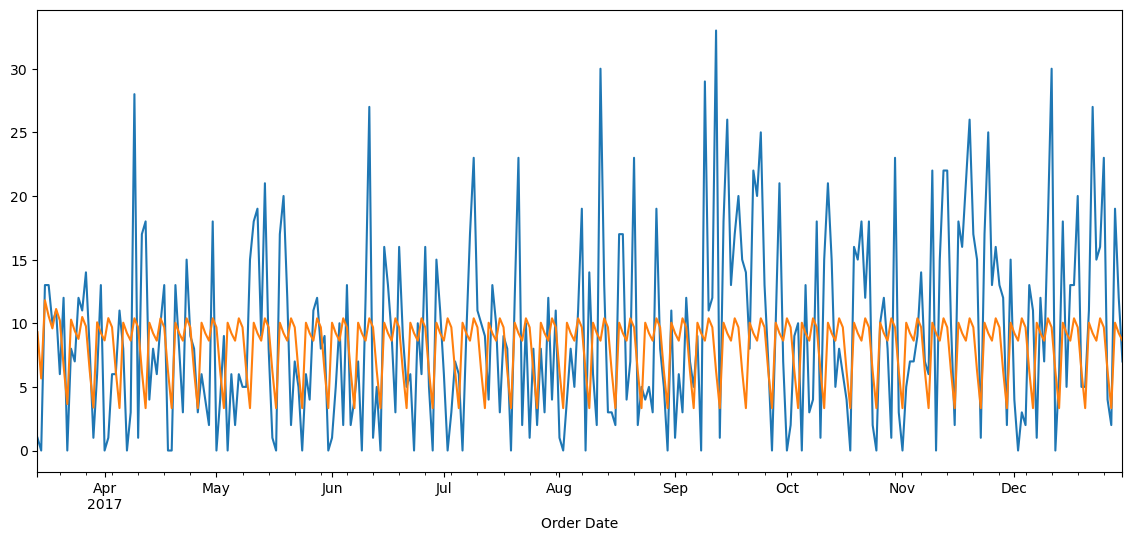

In [98]:
plt.figure(figsize=(14, 6))
test_data['Order Count'].plot()
test_data['Predict_sarima'].plot()

2017-12-31    11.892821
2018-01-01    13.023273
2018-01-02     7.339652
2018-01-03     4.510560
2018-01-04    11.046615
2018-01-05    11.314299
2018-01-06    10.301775
2018-01-07    11.669433
2018-01-08    13.051275
2018-01-09     7.004345
2018-01-10     4.247049
2018-01-11    11.137916
2018-01-12    11.226821
2018-01-13    10.105290
2018-01-14    11.599195
2018-01-15    12.994263
2018-01-16     6.958069
2018-01-17     4.209487
2018-01-18    11.107427
2018-01-19    11.202074
2018-01-20    10.085203
2018-01-21    11.582891
2018-01-22    12.981029
2018-01-23     6.947327
2018-01-24     4.200768
2018-01-25    11.100350
2018-01-26    11.196329
2018-01-27    10.080540
2018-01-28    11.579106
2018-01-29    12.977956
2018-01-30     6.944833
Freq: D, Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Order Date'>

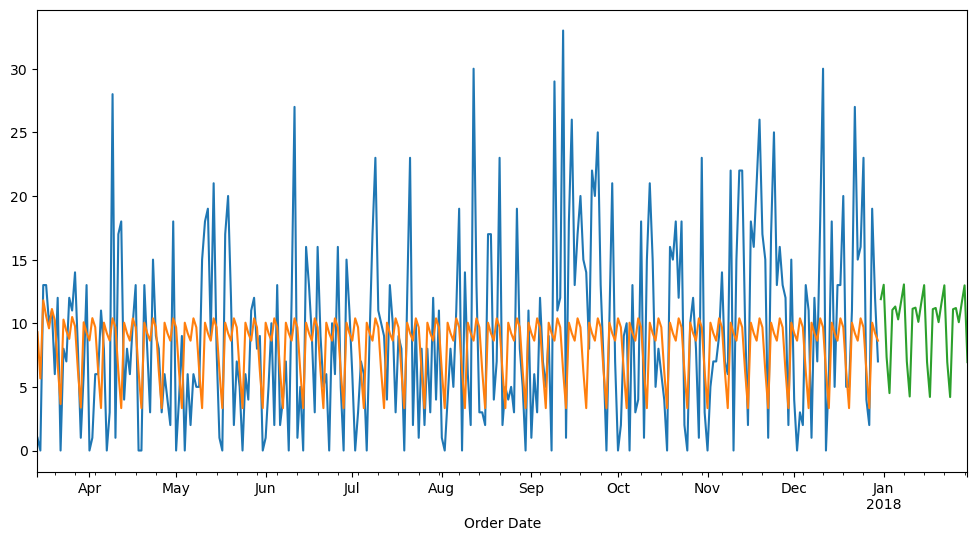

In [99]:
final_sarima = SARIMAX(daily_orders['Order Count'],order=(1, 0, 1), seasonal_order=((0, 1, 2, 7))).fit() # (5,1,4,13)
forecast_sarima = final_sarima.predict(len(daily_orders), len(daily_orders)+30)
print(forecast_sarima)
plt.figure(figsize=(12,6))
test_data['Order Count'].plot()
sarima_pred.plot()
forecast_sarima.plot()

In [100]:
#  prophet model
# !pip install prophet
from prophet import Prophet

14:48:10 - cmdstanpy - INFO - Chain [1] start processing
14:48:10 - cmdstanpy - INFO - Chain [1] done processing


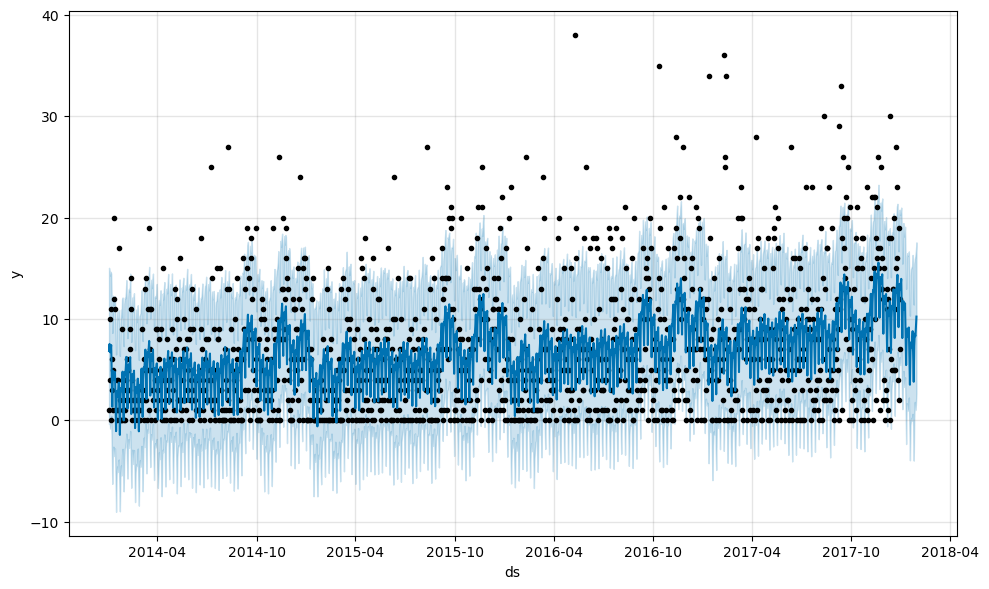

In [102]:
prophet_data = daily_orders.reset_index()
prophet_data.columns = ['ds', 'y']  # Prophet requires these column names

# Fit Prophet Model
model = Prophet()
model.fit(prophet_data)

# Forecast Future
future = model.make_future_dataframe(periods=30)  # Forecast for next 30 days
prophet_forecast = model.predict(future)

# Visualize Forecast
fig = model.plot(prophet_forecast)
# plt.title('Forecast of Daily Order Volume')
# plt.xlabel('Date')
# plt.ylabel('Order Count')
plt.show()

In [103]:
prophet_forecast

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2014-01-02  4.662752   -0.373158   15.044286     4.662752     4.662752   
1    2014-01-03  4.665347    0.168264   14.678670     4.665347     4.665347   
2    2014-01-04  4.667942   -0.818999   14.282796     4.667942     4.667942   
3    2014-01-05  4.670537   -0.575246   14.654570     4.670537     4.670537   
4    2014-01-06  4.673133    0.441023   14.474393     4.673133     4.673133   
...         ...       ...         ...         ...          ...          ...   
1484 2018-01-25  9.668328    0.117790   15.493681     9.667890     9.668743   
1485 2018-01-26  9.672388    1.807925   15.917135     9.671920     9.672842   
1486 2018-01-27  9.676449    1.011482   16.198223     9.675923     9.676946   
1487 2018-01-28  9.680510    1.510706   16.741754     9.679865     9.681039   
1488 2018-01-29  9.684570    2.704606   17.555578     9.683892     9.685132   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0           2.168174              2.168174              2.168174 -0.069149   
1           2.863805              2.863805              2.863805  0.923055   
2           2.045023              2.045023              2.045023  0.436762   
3           2.283944              2.283944              2.283944  1.037928   
4           2.750708              2.750708              2.750708  1.889785   
...              ...                   ...                   ...       ...   
1484       -2.335579             -2.335579             -2.335579 -0.069149   
1485       -1.128202             -1.128202             -1.128202  0.923055   
1486       -1.384046             -1.384046             -1.384046  0.436762   
1487       -0.544504             -0.544504             -0.544504  1.037928   
1488        0.546257              0.546257              0.546257  1.889785   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0        -0.069149     -0.069149  2.237323      2.237323      2.237323   
1         0.923055      0.923055  1.940750      1.940750      1.940750   
2         0.436762      0.436762  1.608261      1.608261      1.608261   
3         1.037928      1.037928  1.246016      1.246016      1.246016   
4         1.889785      1.889785  0.860923      0.860923      0.860923   
...            ...           ...       ...           ...           ...   
1484     -0.069149     -0.069149 -2.266430     -2.266430     -2.266430   
1485      0.923055      0.923055 -2.051257     -2.051257     -2.051257   
1486      0.436762      0.436762 -1.820808     -1.820808     -1.820808   
1487      1.037928      1.037928 -1.582431     -1.582431     -1.582431   
1488      1.889785      1.889785 -1.343528     -1.343528     -1.343528   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
1484                   0.0                         0.0   
1485                   0.0                         0.0   
1486                   0.0                         0.0   
1487                   0.0                         0.0   
1488                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
0                            0.0   6.830926  
1                            0.0   7.529152  
2                            0.0   6.712965  
3                            0.0   6.954481  
4                            0.0   7.423841  
...                          ...        ...  
1484                         0.0   7.332749  
1485                         0.0   8.544186  
1486                         0.0   8.292403  
1487                         0.0   9.136006  
1488                         0.0  1

Index(['Order Date', 'Order Count'], dtype='object')


15:56:43 - cmdstanpy - INFO - Chain [1] start processing
15:56:43 - cmdstanpy - INFO - Chain [1] done processing


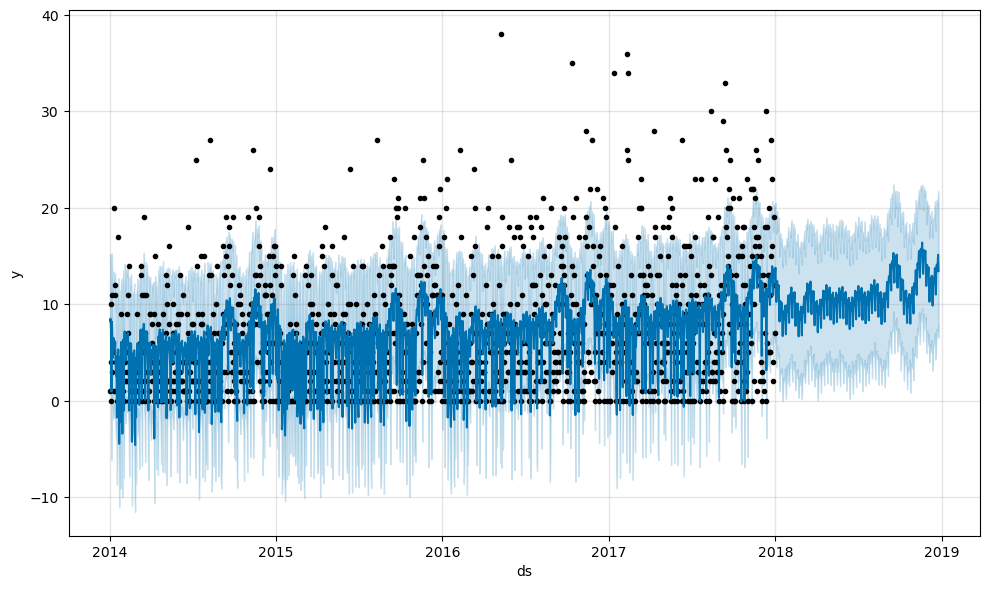

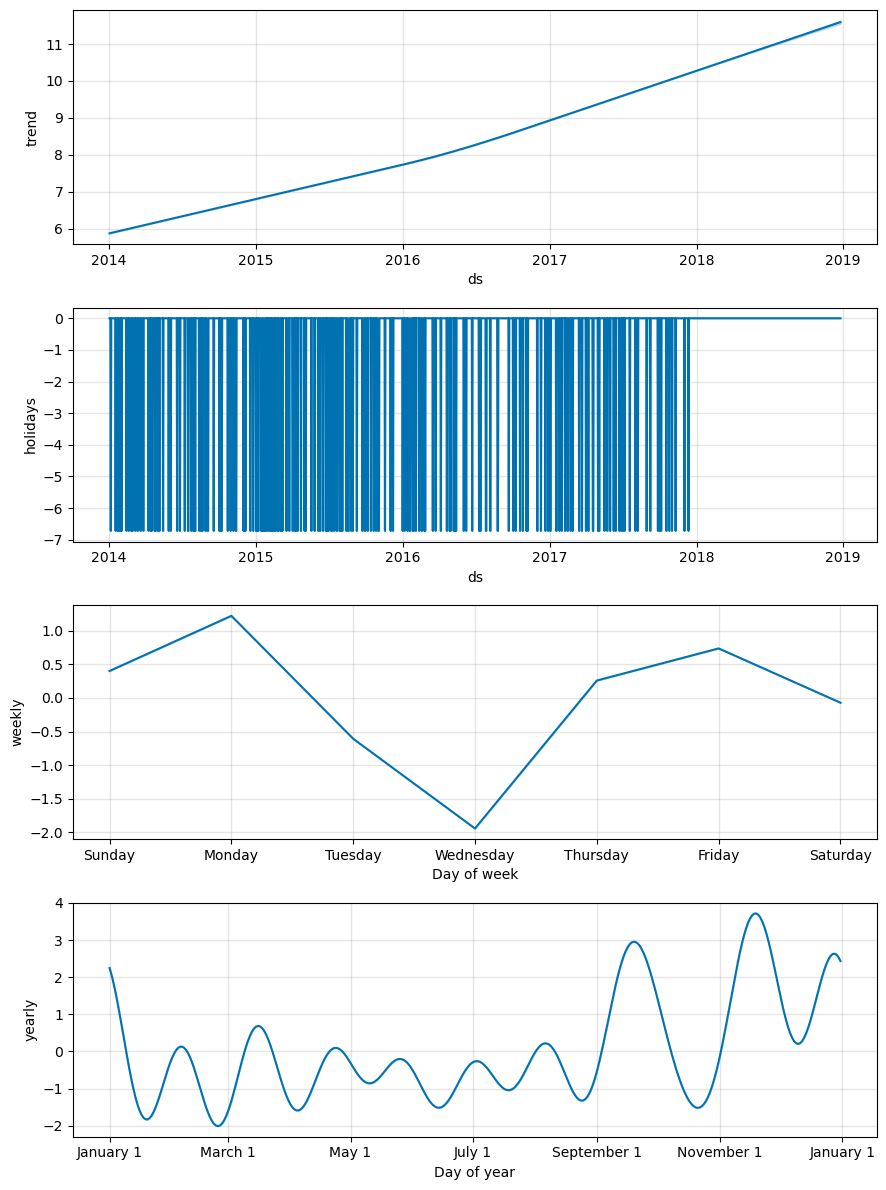

In [127]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data for Prophet
prophet_data = daily_orders.reset_index()  # Reset index to bring 'Order Date' as a column
print(prophet_data.columns)  # Check column names

# Rename columns for Prophet
prophet_data.columns = ['ds', 'y']  # Prophet requires 'ds' for dates and 'y' for the target variable

# Identify holidays (Order Count == 0)
holidays = daily_orders[daily_orders['Order Count'] == 0].reset_index()

# Now use 'Order Date' (the datetime column) instead of 'index'
holidays = holidays[['Order Date']]  # Use 'Order Date' for the datetime column
holidays.columns = ['ds']  # Rename for Prophet
holidays['holiday'] = 'Holiday'  # Add the 'holiday' label

# Fit the Prophet Model with holidays
model = Prophet(holidays=holidays)
model.fit(prophet_data)

# Forecast for the next 30 days
future = model.make_future_dataframe(periods=360)
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
# plt.title('Forecast of Daily Order Volume with Holidays')
# plt.xlabel('Date')
# plt.ylabel('Order Count')
plt.show()

# Optional: Plot holiday components
fig_holidays = model.plot_components(forecast)
plt.show()


In [130]:
forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2014-01-02   5.878144    1.234378   15.204123     5.878144     5.878144   
1    2014-01-03   5.880687    1.884198   15.224609     5.880687     5.880687   
2    2014-01-04   5.883231    0.538272   14.322344     5.883231     5.883231   
3    2014-01-05   5.885774   -6.129202    7.696285     5.885774     5.885774   
4    2014-01-06   5.888317    1.453202   15.242672     5.888317     5.888317   
...         ...        ...         ...         ...          ...          ...   
1814 2018-12-21  11.578760    7.448081   20.818511    11.533766    11.617976   
1815 2018-12-22  11.582441    7.092413   20.308705    11.537284    11.621865   
1816 2018-12-23  11.586121    6.545444   20.544478    11.540842    11.625698   
1817 2018-12-24  11.589801    7.829358   21.740510    11.544292    11.629519   
1818 2018-12-25  11.593481    6.546787   20.355236    11.547736    11.633334   

       Holiday  Holiday_lower  Holiday_upper  additive_terms  ...    weekly  \
0     0.000000       0.000000       0.000000        2.364810  ...  0.258983   
1     0.000000       0.000000       0.000000        2.626319  ...  0.736992   
2     0.000000       0.000000       0.000000        1.572842  ... -0.070441   
3    -6.719806      -6.719806      -6.719806       -4.945783  ...  0.401552   
4     0.000000       0.000000       0.000000        2.303839  ...  1.221568   
...        ...            ...            ...             ...  ...       ...   
1814  0.000000       0.000000       0.000000        2.527295  ...  0.736992   
1815  0.000000       0.000000       0.000000        1.914924  ... -0.070441   
1816  0.000000       0.000000       0.000000        2.565406  ...  0.401552   
1817  0.000000       0.000000       0.000000        3.541786  ...  1.221568   
1818  0.000000       0.000000       0.000000        1.842650  ... -0.606767   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0         0.258983      0.258983  2.105827      2.105827      2.105827   
1         0.736992      0.736992  1.889328      1.889328      1.889328   
2        -0.070441     -0.070441  1.643283      1.643283      1.643283   
3         0.401552      0.401552  1.372471      1.372471      1.372471   
4         1.221568      1.221568  1.082271      1.082271      1.082271   
...            ...           ...       ...           ...           ...   
1814      0.736992      0.736992  1.790303      1.790303      1.790303   
1815     -0.070441     -0.070441  1.985366      1.985366      1.985366   
1816      0.401552      0.401552  2.163853      2.163853      2.163853   
1817      1.221568      1.221568  2.320217      2.320217      2.320217   
1818     -0.606767     -0.606767  2.449417      2.449417      2.449417   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
1814                   0.0                         0.0   
1815                   0.0                         0.0   
1816                   0.0                         0.0   
1817                   0.0                         0.0   
1818                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
0                            0.0   8.242954  
1                            0.0   8.507007  
2                            0.0   7.456073  
3                            0.0   0.939991  
4                            0.0   8.192156  
...                          ...        ...  
1814                         0.0  14.106055  
1815                         0.0  13.497365  
1816                         0.0  14.151527  
1817                         0.0  15.131586  
1818       

                    0
2017-03-14   7.790824
2017-03-15   4.796339
2017-03-16  10.397228
2017-03-17  10.178028
2017-03-18   9.560854
...               ...
2017-12-26   9.015424
2017-12-27   6.020939
2017-12-28  11.621828
2017-12-29  11.402628
2017-12-30  10.785454

[292 rows x 1 columns]


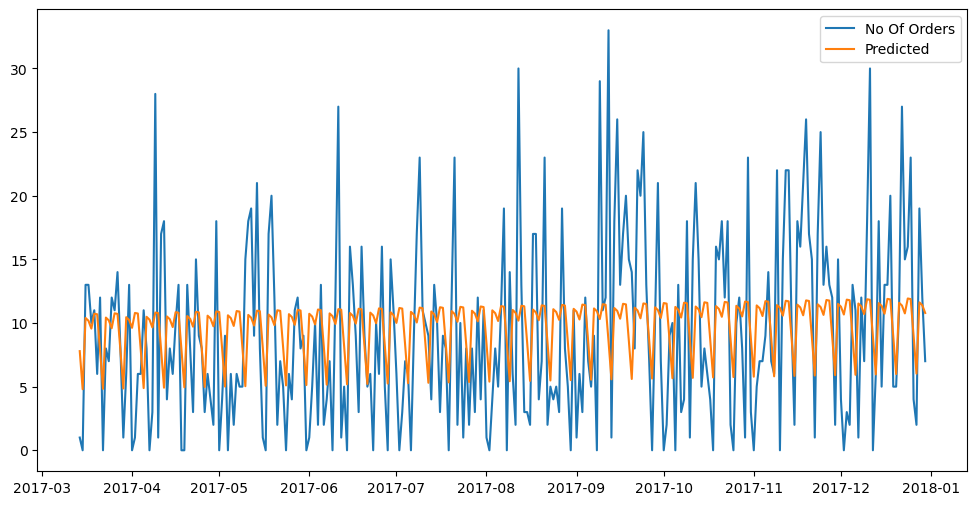

In [157]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
hw_model = ExponentialSmoothing(train_data['Order Count'], seasonal='add', trend ='add', damped_trend= None, seasonal_periods=7).fit()
hw_pred = hw_model.predict(start = test_data.index[0], end = test_data.index[-1])
hw_pred = pd.DataFrame(hw_pred, index=hw_pred.index)
print(hw_pred)

plt.figure(figsize=(12,6))
plt.plot(test_data['Order Count'], label = 'No Of Orders')
plt.plot(hw_pred, label = 'Predicted')
plt.legend()

                    0
2017-12-31  11.956117
2018-01-01  11.910716
2018-01-02   9.045292
2018-01-03   6.050807
2018-01-04  11.651696
...               ...
2018-02-25  12.195063
2018-02-26  12.149663
2018-02-27   9.284239
2018-02-28   6.289754
2018-03-01  11.890642

[61 rows x 1 columns]


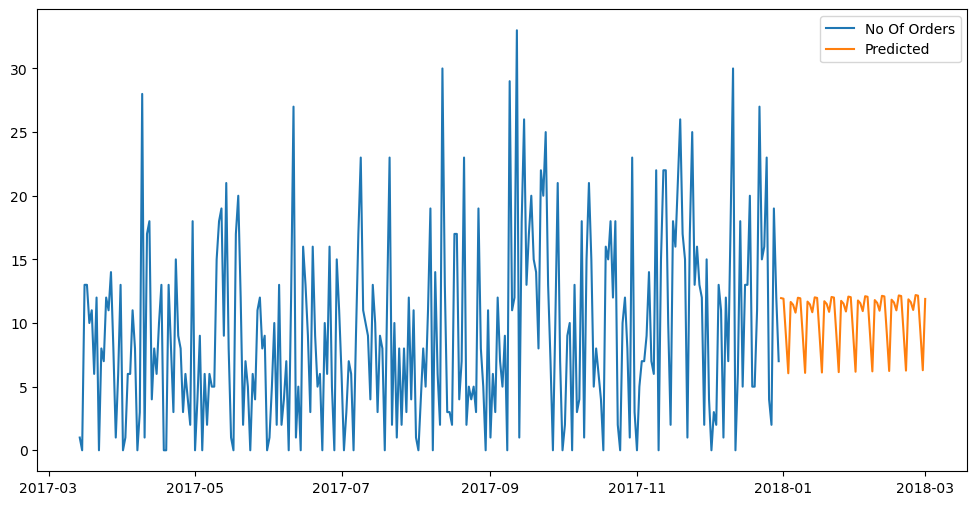

In [158]:
hw_final_model = ExponentialSmoothing(train_data['Order Count'], seasonal='add', trend ='add', damped_trend= None, seasonal_periods=7).fit()
future = hw_final_model.predict(start = len(daily_orders), end = len(daily_orders)+60)
forecast_future = pd.DataFrame(future, index = future.index)
print(forecast_future)

plt.figure(figsize=(12,6))
plt.plot(test_data['Order Count'], label = 'No Of Orders')
plt.plot(forecast_future, label = 'Predicted')
plt.legend()


In [159]:
hw_future_forecast

2017-03-14     7.790824
2017-03-15     4.796339
2017-03-16    10.397228
2017-03-17    10.178028
2017-03-18     9.560854
                ...    
2017-12-26     9.015424
2017-12-27     6.020939
2017-12-28    11.621828
2017-12-29    11.402628
2017-12-30    10.785454
Freq: D, Length: 292, dtype: float64

In [166]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Prepare data for LSTM
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data['Order Count'].values.reshape(-1, 1))
scaled_test = scaler.transform(test_data['Order Count'].values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 14
X_train, y_train = create_sequences(scaled_train, seq_length)
X_test, y_test = create_sequences(scaled_test, seq_length)

# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Predict
lstm_predictions = model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Evaluate performance
mae_lstm = mean_absolute_error(test_data['Order Count'][seq_length:], lstm_predictions)
print(f"LSTM MAE: {mae_lstm}")


Epoch 1/10
73/73 [==============================] - 4s 7ms/step - loss: 0.0275
Epoch 2/10
73/73 [==============================] - 1s 7ms/step - loss: 0.0251
Epoch 3/10
73/73 [==============================] - 1s 7ms/step - loss: 0.0260
Epoch 4/10
73/73 [==============================] - 1s 7ms/step - loss: 0.0248
Epoch 5/10
73/73 [==============================] - 1s 7ms/step - loss: 0.0248
Epoch 6/10
73/73 [==============================] - 1s 7ms/step - loss: 0.0248
Epoch 7/10
73/73 [==============================] - 1s 10ms/step - loss: 0.0249
Epoch 8/10
73/73 [==============================] - 1s 7ms/step - loss: 0.0247
Epoch 9/10
73/73 [==============================] - 1s 7ms/step - loss: 0.0246
Epoch 10/10
9/9 [==============================] - 1s 3ms/step
LSTM MAE: 5.934327125549316


In [167]:
lstm_predictions

array([[ 7.292772 ],
       [ 7.229276 ],
       [ 6.524271 ],
       [ 6.1792674],
       [ 6.5362506],
       [ 5.995344 ],
       [ 5.4408903],
       [ 5.3696046],
       [ 5.4286857],
       [ 5.919806 ],
       [ 6.165324 ],
       [ 5.697736 ],
       [ 5.36594  ],
       [ 7.1194067],
       [ 6.812094 ],
       [ 7.400084 ],
       [ 8.119647 ],
       [ 7.579034 ],
       [ 7.2002788],
       [ 6.7907195],
       [ 6.7768903],
       [ 7.0934677],
       [ 6.4195423],
       [ 5.66802  ],
       [ 6.036852 ],
       [ 6.2332582],
       [ 5.9708457],
       [ 6.5440226],
       [ 6.759817 ],
       [ 6.741963 ],
       [ 6.284991 ],
       [ 6.0683866],
       [ 5.7899165],
       [ 5.415747 ],
       [ 6.327188 ],
       [ 5.9586043],
       [ 5.70007  ],
       [ 5.8841367],
       [ 5.442264 ],
       [ 5.403105 ],
       [ 5.1753435],
       [ 5.2301245],
       [ 5.282822 ],
       [ 5.3246946],
       [ 6.1357694],
       [ 7.201649 ],
       [ 8.175237 ],
       [ 8.08

## Forecasting with monthly orders

##    2. Use a library like `seaborn` to generate a heatmap of the correlation matrix between different numerical features. 


In [109]:
monthly_orders

monthly_orders['Date'] = pd.to_datetime(monthly_orders[['Year', 'Month']].assign(Day=1))

monthly_orders.drop(['Year', 'Month'], axis=1, inplace=True)
monthly_orders

monthly_orders.set_index(monthly_orders["Date"], inplace=True)

monthly_orders.drop('Date',axis=1)

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_orders, x = monthly_orders.index, y = 'Order_Count', markers='o')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(data=monthly_orders, x= monthly_orders.index, palette='viridis', kde=True)
plt.show()

decompose_ts_monthly = seasonal_decompose(monthly_orders['Order_Count'])
decompose_ts_monthly.plot()
plt.show()

# Stationarity checking
import warnings
warnings.filterwarnings('ignore')
plot_acf(monthly_orders['Order_Count'].dropna())
plot_pacf(monthly_orders['Order_Count'].dropna())
plt.show()

adfuller_test(monthly_orders['Order_Count'])

len(monthly_orders)

monthly_train = monthly_orders[:-8]
monthly_test = monthly_orders[-8:]

monthly_train, monthly_test

monthly_arima = ARIMA(monthly_train['Order_Count'], order=(6,3,7)).fit()
monthly_arima.summary()

monthly_arima.plot_diagnostics(figsize=(12,8))
plt.show()

monthly_pred_start = monthly_test.index[0]
monthly_pred_end = monthly_test.index[-1]
print(monthly_pred_start)
print(monthly_pred_end)

monthly_arima_pred = monthly_arima.predict(start = monthly_pred_start, end = monthly_pred_end)
resids = monthly_test['Order_Count'] - monthly_arima_pred
pd.DataFrame({'Order Count': monthly_test['Order_Count'], 'ARIMA Predicted': monthly_arima_pred, 'ARIMA Residuals': resids})

plt.figure(figsize=(12,6))
monthly_orders['Order_Count'].plot()
monthly_arima_pred.plot()

resids.plot(kind='kde')

monthly_Arima_test_mape= (np.abs(monthly_test['Order_Count']-monthly_arima_pred)/monthly_test['Order_Count']).mean()
monthly_Arima_test_rmse = np.sqrt(((monthly_test['Order_Count'] - monthly_arima_pred) ** 2).mean())
print("Monthly Arima_test_mape:",monthly_Arima_test_mape)
print("Monthly Arima_test_rmse:",monthly_Arima_test_rmse)

monthly_arima_final_model = ARIMA(monthly_orders['Order_Count'], order=(6,3,7)).fit()
monthly_future_orders = monthly_arima_final_model.predict(len(monthly_orders), len(monthly_orders)+6)
monthly_future_orders

train_pred = monthly_arima.predict(start = monthly_orders.index[0], end = monthly_orders.index[-1])
plt.figure(figsize=(12,6))
monthly_orders['Order_Count'].plot(legend=True)
train_pred.plot(legend=True)
monthly_future_orders.plot(legend=True)
plt.show()

### Monthly Seasonal ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Define parameter ranges
p_range = range(0, 6)
d_range = range(0, 2)
q_range = range(0, 7)
P_range = range(0, 8)
D_range = range(0, 2)
Q_range = range(0, 8)
s_range = [6, 12]

get_seasonal_combos(p_range, d_range, q_range, P_range, D_range, Q_range, s_range)


monthly_sarima_model = SARIMAX(monthly_train['Order_Count'], order=(1,2,9), seasonal_order=(1,2,9,12)).fit()

monthly_sarima_model.summary()

monthly_sarima_pred = monthly_sarima_model.predict(start = monthly_test.index[0], end = monthly_test.index[-1])
resids = monthly_test['Order_Count'] - monthly_sarima_pred
pd.DataFrame({'Order Count': monthly_test['Order_Count'], 'SARIMA Predicted': monthly_sarima_pred, 'SARIMA Residuals': resids})

plt.figure(figsize=(12,6))
monthly_orders['Order_Count'].plot()
monthly_sarima_pred.plot()

Year  Month  Order_Count
0   2014      1          131
1   2014      2           86
2   2014      3          168
3   2014      4          121
4   2014      5          148
5   2014      6          137
6   2014      7          156
7   2014      8          150
8   2014      9          239
9   2014     10          145
10  2014     11          263
11  2014     12          249
12  2015      1           86
13  2015      2          102
14  2015      3          154
15  2015      4          159
16  2015      5          177
17  2015      6          152
18  2015      7          132
19  2015      8          178
20  2015      9          278
21  2015     10          155
22  2015     11          282
23  2015     12          247
24  2016      1          154
25  2016      2          126
26  2016      3          193
27  2016      4          188
28  2016      5          260
29  2016      6          189
30  2016      7          208
31  2016      8          237
32  2016      9          236
33  2016     10          236
34  2016     11          293
35  2016     12          267
36  2017      1          226
37  2017      2          234
38  2017      3          304
39  2017      4          229
40  2017      5          241
41  2017      6          229
42  2017      7          244
43  2017      8          251
44  2017      9          385
45  2017     10          272
46  2017     11          375
47  2017     12          322

### Monthly Seasonal ARIMA

In [131]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Define parameter ranges
p_range = range(0, 6)
d_range = range(0, 2)
q_range = range(0, 7)
P_range = range(0, 8)
D_range = range(0, 2)
Q_range = range(0, 8)
s_range = [6, 12]

get_seasonal_combos(p_range, d_range, q_range, P_range, D_range, Q_range, s_range)


(21504,
 [{'order': (0, 0, 0), 'seasonal_order': (0, 0, 0, 6)},
  {'order': (0, 0, 0), 'seasonal_order': (0, 0, 0, 12)},
  {'order': (0, 0, 0), 'seasonal_order': (0, 0, 1, 6)},
  {'order': (0, 0, 0), 'seasonal_order': (0, 0, 1, 12)},
  {'order': (0, 0, 0), 'seasonal_order': (0, 0, 2, 6)}])

In [192]:
monthly_sarima_model = SARIMAX(monthly_train['Order_Count'], order=(1,2,9), seasonal_order=(1,2,9,12)).fit()

In [193]:
monthly_sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        Order_Count   No. Observations:                   40
Model:             SARIMAX(1, 2, 9)x(1, 2, 9, 12)   Log Likelihood                 -77.675
Date:                            Tue, 14 Jan 2025   AIC                            197.349
Time:                                    06:47:16   BIC                            210.770
Sample:                                01-01-2014   HQIC                           196.107
                                     - 04-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9943    753.955      0.001      0.999   -1476.730    1478.719
ma.L1         -2.8268   1.76e+04     -0.000      1.000   -3.44e+04    3.44e+04
ma.L2          2.6768    1.4e+04      0.000      1.000   -2.74e+04    2.74e+04
ma.L3         -1.0299   8788.906     -0.000      1.000   -1.72e+04    1.72e+04
ma.L4          0.2911   4075.693   7.14e-05      1.000   -7987.921    7988.503
ma.L5         -0.1739   3764.160  -4.62e-05      1.000   -7377.793    7377.445
ma.L6         -0.5393   7033.209  -7.67e-05      1.000   -1.38e+04    1.38e+04
ma.L7          2.2561   1.86e+04      0.000      1.000   -3.64e+04    3.64e+04
ma.L8         -2.5977   1.17e+04     -0.000      1.000    -2.3e+04     2.3e+04
ma.L9          0.9436   1733.029      0.001      1.000   -3395.730    3397.617
ar.S.L12      -0.6796   1.48e+04   -4.6e-05      1.000   -2.89e+04    2.89e+04
ma.S.L12      -0.9001   8208.429     -0.000      1.000   -1.61e+04    1.61e+04
ma.S.L24      -0.5684   4072.110     -0.000      1.000   -7981.757    7980.620
ma.S.L36       0.8863   2276.183      0.000      1.000   -4460.351    4462.123
ma.S.L48      -0.3939   1.48e+04  -2.66e-05      1.000    -2.9e+04     2.9e+04
ma.S.L60       0.0003   1.32e+04   2.31e-08      1.000   -2.59e+04    2.59e+04
ma.S.L72       0.1217   1.75e+04   6.95e-06      1.000   -3.43e+04    3.43e+04
ma.S.L84      -0.0818   3802.611  -2.15e-05      1.000   -7453.063    7452.900
ma.S.L96       0.0163   5452.975   2.99e-06      1.000   -1.07e+04    1.07e+04
ma.S.L108      0.0038   1904.357   1.97e-06      1.000   -3732.467    3732.475
sigma2       300.0138     12.527     23.949      0.000     275.461     324.567
===================================================================================
Ljung-Box (L1) (Q):                   1.25   Jarque-Bera (JB):                 0.37
Prob(Q):                              0.26   Prob(JB):                         0.83
Heteroskedasticity (H):               0.39   Skew:                            -0.40
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.32e+22. Standard errors may be unstable.
"""

In [194]:
monthly_sarima_pred = monthly_sarima_model.predict(start = monthly_test.index[0], end = monthly_test.index[-1])
resids = monthly_test['Order_Count'] - monthly_sarima_pred
pd.DataFrame({'Order Count': monthly_test['Order_Count'], 'SARIMA Predicted': monthly_sarima_pred, 'SARIMA Residuals': resids})

Order Count  SARIMA Predicted  SARIMA Residuals
2017-05-01          241        340.522764        -99.522764
2017-06-01          229        229.217094         -0.217094
2017-07-01          244        249.084378         -5.084378
2017-08-01          251        288.437066        -37.437066
2017-09-01          385        253.377555        131.622445
2017-10-01          272        269.740786          2.259214
2017-11-01          375        298.159499         76.840501
2017-12-01          322        249.665902         72.334098

<AxesSubplot:xlabel='Date'>

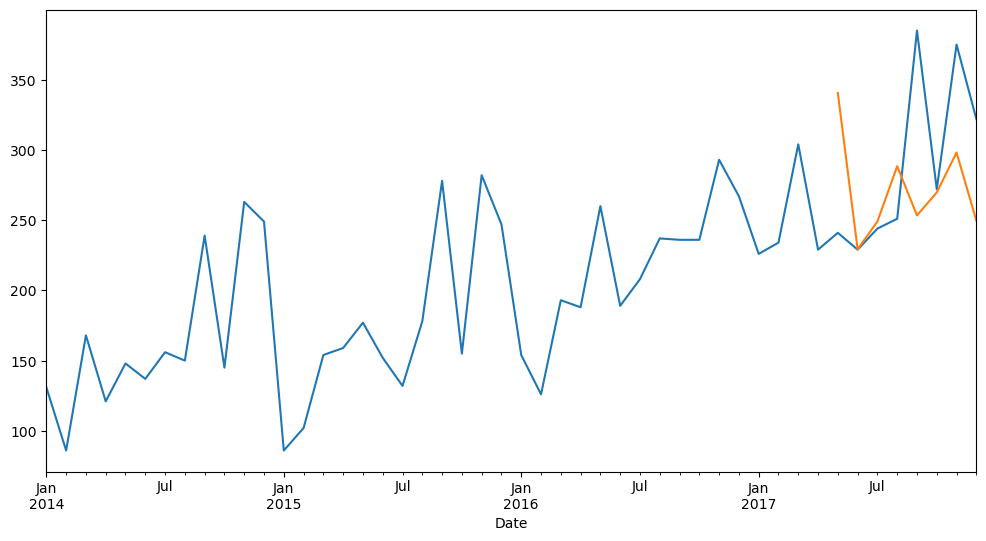

In [195]:
plt.figure(figsize=(12,6))
monthly_orders['Order_Count'].plot()
monthly_sarima_pred.plot()

In [197]:
df.dtypes

Order ID                       object
Order Date             datetime64[ns]
Ship Date              datetime64[ns]
Ship Mode                      object
Customer ID                    object
Customer Name                  object
Segment                        object
Country                        object
City                           object
State                          object
Postal Code                     int64
Region                         object
Retail Sales People            object
Product ID                     object
Category                       object
Sub-Category                   object
Product Name                   object
Returned                       object
Sales                         float64
Quantity                        int64
Discount                      float64
Profit                        float64
Year                            int64
Month                           int64
Day                             int64
dtype: object

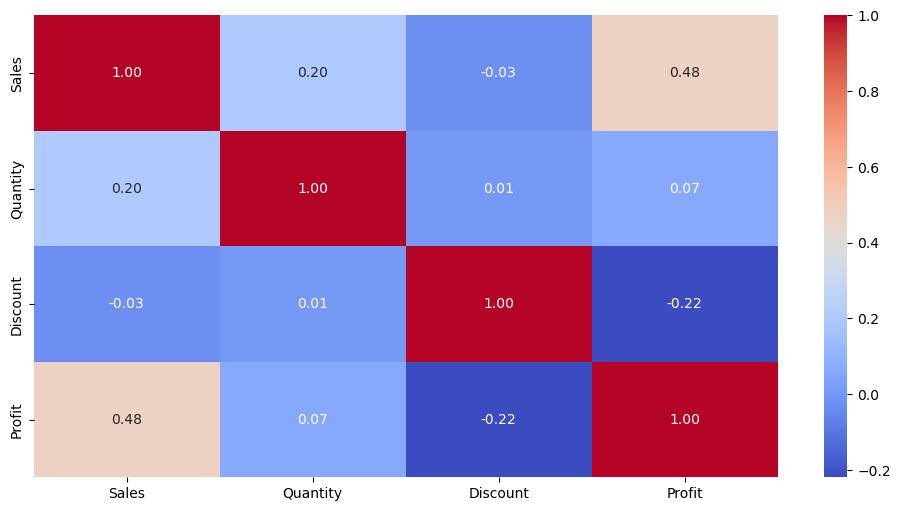

In [202]:
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
plt.figure(figsize=(12,6))
correlation_matrix = df[numeric_cols].corr()
correlation_matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title=(f"Heatmap of Numeric Columns")
plt.show()

##     3. Use a machine learning model (e.g., linear regression) to predict 'Retail Sales' based on 'Quantity' and 'Discount'. 


In [208]:
df[['Quantity', 'Discount', 'Sales']]

Quantity  Discount     Sales
0            2      0.00  261.9600
1            3      0.00  731.9400
2            2      0.00   14.6200
3            5      0.45  957.5775
4            2      0.20   22.3680
...        ...       ...       ...
9989         3      0.20   25.2480
9990         2      0.00   91.9600
9991         2      0.20  258.5760
9992         4      0.00   29.6000
9993         2      0.00  243.1600

[9994 rows x 3 columns]

In [211]:
df[['Quantity', 'Discount', 'Sales']].isna().sum()

Quantity    0
Discount    0
Sales       0
dtype: int64

In [212]:
df[['Quantity', 'Discount', 'Sales']].duplicated().sum() # It's giving duplicates because of removal of date

3294

In [374]:
X = df[['Quantity', 'Discount']]
y = df['Sales']

In [375]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6995, 2), (2999, 2), (6995,), (2999,))

In [376]:
# importing all models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    ExtraTreesRegressor,
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [377]:
def evaluate_models(X, y, test_size=0.3, random_state=42):
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Models to evaluate
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "ElasticNet Regression": ElasticNet(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "AdaBoost": AdaBoostRegressor(),
        "Extra Trees": ExtraTreesRegressor(),
        "Support Vector Regression (SVR)": SVR(kernel='rbf'),
        "K-Nearest Neighbors (KNN)": KNeighborsRegressor(),
        "Multi-layer Perceptron (MLP)": MLPRegressor(max_iter=500),
        "XGBoost": XGBRegressor(eval_metric='rmse', use_label_encoder=False),
        "LightGBM": LGBMRegressor(),
        "CatBoost": CatBoostRegressor(verbose=False),
    }

    # Train and evaluate models
    models_list = []
    r2_list = []
    mae_list = []
    mse_list = []
    rmse_list = []

    # Iterate through models and store names and R2 scores
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        
        models_list.append(name)
        r2_list.append(r2)
        mae_list.append(mae)
        mse_list.append(mse)
        rmse_list.append(rmse)

    # Create a DataFrame with the model names and R2 scores
    result = pd.DataFrame({
        'Model Name': models_list,
        'R2_Score': r2_list,
        'MAE': mae_list,
        'MSE': mse_list,
        'RMSE': rmse_list
    }).sort_values(by=['R2_Score'], ascending=False)
    
    return result

In [378]:
result = evaluate_models(X,y)
result

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27
[LightGBM] [Info] Number of data points in the train set: 6995, number of used features: 2
[LightGBM] [Info] Start training from score 219.936987


Model Name  R2_Score         MAE            MSE  \
6                 Gradient Boosting  0.064528  257.831745  514199.474462   
13                         LightGBM  0.059615  259.688870  516900.034164   
5                     Random Forest  0.055641  259.167407  519084.448537   
14                         CatBoost  0.053929  259.690312  520025.751500   
4                     Decision Tree  0.053794  259.935678  520099.942067   
8                       Extra Trees  0.052118  260.086855  521021.004018   
12                          XGBoost  0.051538  260.121078  521340.152150   
11     Multi-layer Perceptron (MLP)  0.031969  274.447118  532096.397069   
2                  Lasso Regression  0.031887  274.634188  532141.222261   
1                  Ridge Regression  0.031655  274.771472  532268.775167   
0                 Linear Regression  0.031650  274.774941  532271.440583   
3             ElasticNet Regression  0.031239  274.760764  532497.699149   
9   Support Vector Regression (SVR) -0.055431  229.009076  580137.415368   
7                          AdaBoost -0.656317  487.540194  910425.749421   
10        K-Nearest Neighbors (KNN) -0.807404  406.627450  993473.207584   

          RMSE  
6   717.077035  
13  718.957602  
5   720.475155  
14  721.128110  
4   721.179549  
8   721.817847  
12  722.038885  
11  729.449379  
2   729.480104  
1   729.567526  
0   729.569353  
3   729.724399  
9   761.667523  
7   954.162329  
10  996.731261

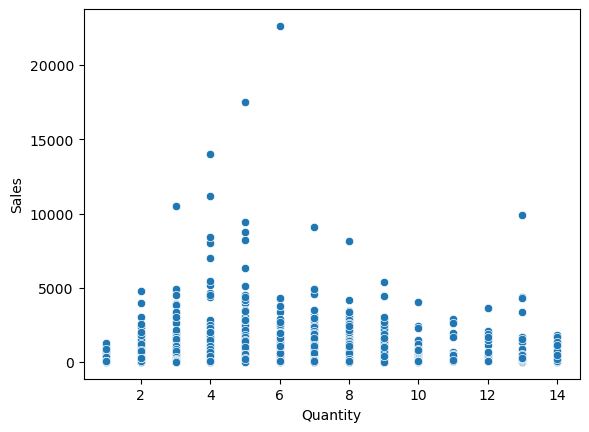

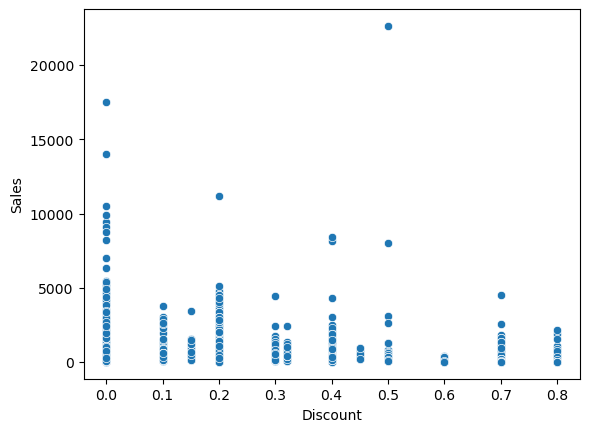

In [326]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Quantity', y='Sales', data=df)

plt.show()

sns.scatterplot(x='Discount', y='Sales', data=df)

plt.show()


#### expanding the futures

In [379]:
# pd.set_option('display.max_columns', None) 
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-12-06 2016-12-06    Second Class    DV-13045   
3       4  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   
4       5  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region Retail Sales People       Product ID         Category  \
0        42420  South   Cassandra Brandow  FUR-BO-10001798        Furniture   
1        42420  South   Cassandra Brandow  FUR-CH-10000454        Furniture   
2        90036   West       Anna Andreadi  OFF-LA-10000240  Office Supplies   
3        33311  South   Cassandra Brandow  FUR-TA-10000577        Furniture   
4        33311  South   Cassandra Brandow  OFF-ST-10000760  Office Supplies   

  Sub-Category                                       Product Name Returned  \
0    Bookcases                  Bush Somerset Collection Bookcase      Not   
1       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...      Not   
2       Labels  Self-Adhesive Address Labels for Typewriters b...      Not   
3       Tables      Bretford CR4500 Series Slim Rectangular Table      Not   
4      Storage                     Eldon Fold 'N Roll Cart System      Not   

      Sales  Quantity  Discount    Profit  
0  261.9600         2      0.00   41.9136  
1  731.9400         3      0.00  219.5820  
2   14.6200         2      0.00    6.8714  
3  957.5775         5      0.45 -383.0310  
4   22.3680         2      0.20    2.5164

In [380]:
# df_filtered = df[['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Returned', 
#         'Quantity', 'Discount','Sales']]
df_filtered = df
df_filtered.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-12-06 2016-12-06    Second Class    DV-13045   
3       4  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   
4       5  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region Retail Sales People       Product ID         Category  \
0        42420  South   Cassandra Brandow  FUR-BO-10001798        Furniture   
1        42420  South   Cassandra Brandow  FUR-CH-10000454        Furniture   
2        90036   West       Anna Andreadi  OFF-LA-10000240  Office Supplies   
3        33311  South   Cassandra Brandow  FUR-TA-10000577        Furniture   
4        33311  South   Cassandra Brandow  OFF-ST-10000760  Office Supplies   

  Sub-Category                                       Product Name Returned  \
0    Bookcases                  Bush Somerset Collection Bookcase      Not   
1       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...      Not   
2       Labels  Self-Adhesive Address Labels for Typewriters b...      Not   
3       Tables      Bretford CR4500 Series Slim Rectangular Table      Not   
4      Storage                     Eldon Fold 'N Roll Cart System      Not   

      Sales  Quantity  Discount    Profit  
0  261.9600         2      0.00   41.9136  
1  731.9400         3      0.00  219.5820  
2   14.6200         2      0.00    6.8714  
3  957.5775         5      0.45 -383.0310  
4   22.3680         2      0.20    2.5164

In [381]:
df_filtered = df_filtered.drop(['Order ID','Row ID', 'Order Date','Ship Date' ], axis=1)
df_filtered

Ship Mode Customer ID     Customer Name    Segment        Country  \
0       Second Class    CG-12520       Claire Gute   Consumer  United States   
1       Second Class    CG-12520       Claire Gute   Consumer  United States   
2       Second Class    DV-13045   Darrin Van Huff  Corporate  United States   
3     Standard Class    SO-20335    Sean O'Donnell   Consumer  United States   
4     Standard Class    SO-20335    Sean O'Donnell   Consumer  United States   
...              ...         ...               ...        ...            ...   
9989    Second Class    TB-21400  Tom Boeckenhauer   Consumer  United States   
9990  Standard Class    DB-13060       Dave Brooks   Consumer  United States   
9991  Standard Class    DB-13060       Dave Brooks   Consumer  United States   
9992  Standard Class    DB-13060       Dave Brooks   Consumer  United States   
9993    Second Class    CC-12220      Chris Cortes   Consumer  United States   

                 City       State  Postal Code Region Retail Sales People  \
0           Henderson    Kentucky        42420  South   Cassandra Brandow   
1           Henderson    Kentucky        42420  South   Cassandra Brandow   
2         Los Angeles  California        90036   West       Anna Andreadi   
3     Fort Lauderdale     Florida        33311  South   Cassandra Brandow   
4     Fort Lauderdale     Florida        33311  South   Cassandra Brandow   
...               ...         ...          ...    ...                 ...   
9989            Miami     Florida        33180  South   Cassandra Brandow   
9990       Costa Mesa  California        92627   West       Anna Andreadi   
9991       Costa Mesa  California        92627   West       Anna Andreadi   
9992       Costa Mesa  California        92627   West       Anna Andreadi   
9993      Westminster  California        92683   West       Anna Andreadi   

           Product ID         Category Sub-Category  \
0     FUR-BO-10001798        Furniture    Bookcases   
1     FUR-CH-10000454        Furniture       Chairs   
2     OFF-LA-10000240  Office Supplies       Labels   
3     FUR-TA-10000577        Furniture       Tables   
4     OFF-ST-10000760  Office Supplies      Storage   
...               ...              ...          ...   
9989  FUR-FU-10001889        Furniture  Furnishings   
9990  FUR-FU-10000747        Furniture  Furnishings   
9991  TEC-PH-10003645       Technology       Phones   
9992  OFF-PA-10004041  Office Supplies        Paper   
9993  OFF-AP-10002684  Office Supplies   Appliances   

                                           Product Name Returned     Sales  \
0                     Bush Somerset Collection Bookcase      Not  261.9600   
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...      Not  731.9400   
2     Self-Adhesive Address Labels for Typewriters b...      Not   14.6200   
3         Bretford CR4500 Series Slim Rectangular Table      Not  957.5775   
4                        Eldon Fold 'N Roll Cart System      Not   22.3680   
...                                                 ...      ...       ...   
9989                             Ultra Door Pull Handle      Not   25.2480   
9990  Tenex B1-RE Series Chair Mats for Low Pile Car...      Yes   91.9600   
9991                              Aastra 57i VoIP phone      Yes  258.5760   
9992  It's Hot Message Books with Stickers, 2 3/4" x 5"      Yes   29.6000   
9993  Acco 7-Outlet Masterpiece Power Center, Wihtou...      Not  243.1600   

      Quantity  Discount    Profit  
0            2      0.00   41.9136  
1            3      0.00  219.5820  
2            2      0.00    6.8714  
3            5      0.45 -383.0310  
4            2      0.20    2.5164  
...        ...       ...       ...  
9989         3      0.20    4.1028  
9990         2      0.00   15.6332  
9991         2      0.20   19.3932  
9992         4      0.00   13.3200  
9993         2      0.00   72.9480  

[9994 rows x 19 columns]

In [382]:
df_filtered.dtypes

Ship Mode               object
Customer ID             object
Customer Name           object
Segment                 object
Country                 object
City                    object
State                   object
Postal Code              int64
Region                  object
Retail Sales People     object
Product ID              object
Category                object
Sub-Category            object
Product Name            object
Returned                object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object

In [383]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_filtered.columns:
    if df_filtered[col].dtype == 'object':
        df_filtered[col]=le.fit_transform(df[col])

In [384]:
df_filtered.dtypes

Ship Mode                int32
Customer ID              int32
Customer Name            int32
Segment                  int32
Country                  int32
City                     int32
State                    int32
Postal Code              int64
Region                   int32
Retail Sales People      int32
Product ID               int32
Category                 int32
Sub-Category             int32
Product Name             int32
Returned                 int32
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object

In [385]:
X = df_filtered.drop('Sales', axis = 1)
y = df_filtered['Sales']

In [386]:
X,y

(      Ship Mode  Customer ID  Customer Name  Segment  Country  City  State  \
 0             2          143            166        0        0   194     15   
 1             2          143            166        0        0   194     15   
 2             2          237            201        1        0   266      3   
 3             3          705            687        0        0   153      8   
 4             3          705            687        0        0   153      8   
 ...         ...          ...            ...      ...      ...   ...    ...   
 9989          2          737            758        0        0   295      8   
 9990          3          190            202        0        0   104      3   
 9991          3          190            202        0        0   104      3   
 9992          3          190            202        0        0   104      3   
 9993          2          130            146        0        0   517      3   
 
       Postal Code  Region  Retail Sales People  P

In [397]:
# Calling our model function
evaluate_models(X,y, test_size=0.3, random_state=42)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1865
[LightGBM] [Info] Number of data points in the train set: 6995, number of used features: 17
[LightGBM] [Info] Start training from score 219.936987


Model Name  R2_Score         MAE            MSE  \
8                       Extra Trees  0.688420   77.699790  171265.689761   
5                     Random Forest  0.684902   77.778243  173199.377568   
12                          XGBoost  0.664119   77.763207  184623.366796   
6                 Gradient Boosting  0.654070   94.163200  190146.862551   
4                     Decision Tree  0.625665   95.596339  205760.381424   
13                         LightGBM  0.590602   89.364520  225033.088468   
11     Multi-layer Perceptron (MLP)  0.561013  132.446846  241297.375000   
14                         CatBoost  0.548396   87.873741  248232.497467   
10        K-Nearest Neighbors (KNN)  0.266361  206.669181  403258.660653   
0                 Linear Regression  0.109753  238.180063  489341.147457   
1                  Ridge Regression  0.109733  238.159130  489351.658919   
2                  Lasso Regression  0.109178  237.308135  489657.208285   
3             ElasticNet Regression  0.100332  236.678585  494519.278327   
9   Support Vector Regression (SVR) -0.070963  232.202758  588674.868506   
7                          AdaBoost -0.295752  717.785589  712234.190920   

          RMSE  
8   413.842591  
5   416.172293  
12  429.678213  
6   436.058325  
4   453.608181  
13  474.376526  
11  491.220292  
14  498.229362  
10  635.026504  
0   699.529233  
1   699.536746  
2   699.755106  
3   703.220647  
9   767.251503  
7   843.939684

#### checking the top performing model

In [398]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6995, 18), (2999, 18), (6995,), (2999,))

In [399]:
et_model = ExtraTreesRegressor().fit(X_train,y_train)
et_pred = et_model.predict(X_test)
score = r2_score(y_test, et_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 66.84


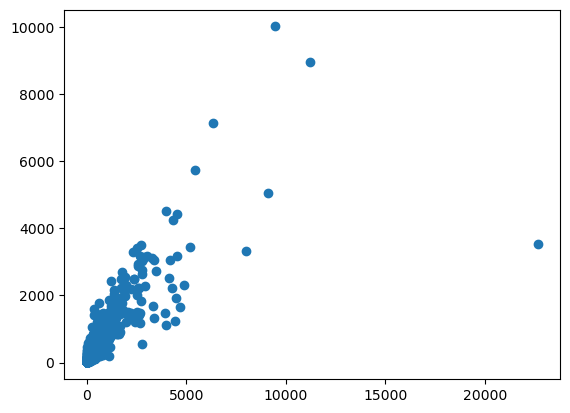

In [390]:
plt.scatter(y_test,et_pred);
# plt.xlabel('Actual');
# plt.ylabel('Predicted');

In [391]:
et_preformace_df = pd.DataFrame({
        "Actual Values": y_test, "Predicted": et_pred, 'Difference': y_test - et_pred
})
et_preformace_df

Actual Values   Predicted  Difference
3125        563.808  287.022660  276.785340
1441         36.672   33.446560    3.225440
4510         37.300   62.300860  -25.000860
39          212.058  494.364222 -282.306222
4509        171.288  332.941610 -161.653610
...             ...         ...         ...
9063        322.192  313.620440    8.571560
2603        136.784  112.793402   23.990598
6112         16.752   15.892280    0.859720
1579        307.980  308.838000   -0.858000
9884         62.310   73.720620  -11.410620

[2999 rows x 3 columns]

##    5. Generate a summary table showing the average order value for the top 5 states with the highest number of orders. 


In [414]:
df = pd.read_excel(r"C:\Users\malli\Personal_Projects\Retail_Supply_Chain_Sales\Data_sets\Retail-Supply-Chain-Sales-Dataset.xlsx")

In [415]:
df.drop('Row ID', axis=1, inplace=True)
df.head()

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-12-06 2016-12-06    Second Class    DV-13045   
3  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   
4  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region Retail Sales People       Product ID         Category  \
0        42420  South   Cassandra Brandow  FUR-BO-10001798        Furniture   
1        42420  South   Cassandra Brandow  FUR-CH-10000454        Furniture   
2        90036   West       Anna Andreadi  OFF-LA-10000240  Office Supplies   
3        33311  South   Cassandra Brandow  FUR-TA-10000577        Furniture   
4        33311  South   Cassandra Brandow  OFF-ST-10000760  Office Supplies   

  Sub-Category                                       Product Name Returned  \
0    Bookcases                  Bush Somerset Collection Bookcase      Not   
1       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...      Not   
2       Labels  Self-Adhesive Address Labels for Typewriters b...      Not   
3       Tables      Bretford CR4500 Series Slim Rectangular Table      Not   
4      Storage                     Eldon Fold 'N Roll Cart System      Not   

      Sales  Quantity  Discount    Profit  
0  261.9600         2      0.00   41.9136  
1  731.9400         3      0.00  219.5820  
2   14.6200         2      0.00    6.8714  
3  957.5775         5      0.45 -383.0310  
4   22.3680         2      0.20    2.5164

In [420]:
states_grouped_df = df.groupby('State')['Order ID'].count().reset_index()
states_grouped_df = states_grouped_df.rename(columns={'Order ID': 'Number of Orders'})
states_grouped_df.sort_values(by='Number of Orders',ascending=False , inplace=True)
states_grouped_df

State  Number of Orders
3             California              2001
30              New York              1128
41                 Texas               985
36          Pennsylvania               587
45            Washington               506
11              Illinois               492
33                  Ohio               469
8                Florida               383
20              Michigan               255
31        North Carolina               249
44              Virginia               224
1                Arizona               224
9                Georgia               184
40             Tennessee               183
4               Colorado               182
12               Indiana               149
15              Kentucky               139
19         Massachusetts               135
28            New Jersey               130
35                Oregon               124
47             Wisconsin               110
18              Maryland               105
6               Delaware                96
21             Minnesota                89
5            Connecticut                82
34              Oklahoma                66
23              Missouri                66
0                Alabama                61
2               Arkansas                60
37          Rhode Island                56
42                  Utah                53
22           Mississippi                53
38        South Carolina                42
16             Louisiana                42
26                Nevada                39
25              Nebraska                38
29            New Mexico                37
13                  Iowa                30
27         New Hampshire                27
14                Kansas                24
10                 Idaho                21
24               Montana                15
39          South Dakota                12
43               Vermont                11
7   District of Columbia                10
17                 Maine                 8
32          North Dakota                 7
46         West Virginia                 4
48               Wyoming                 1

In [421]:
top_5_states = states_grouped_df.nlargest(5,'Number of Orders')['State']
top_5_states

3       California
30        New York
41           Texas
36    Pennsylvania
45      Washington
Name: State, dtype: object

In [423]:
top_states_data = df[df['State'].isin(top_5_states)]
top_states_data

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
2     CA-2016-138688 2016-12-06 2016-12-06    Second Class    DV-13045   
5     CA-2014-115812 2014-09-06 2014-09-06  Standard Class    BH-11710   
6     CA-2014-115812 2014-09-06 2014-09-06  Standard Class    BH-11710   
7     CA-2014-115812 2014-09-06 2014-09-06  Standard Class    BH-11710   
8     CA-2014-115812 2014-09-06 2014-09-06  Standard Class    BH-11710   
...              ...        ...        ...             ...         ...   
9986  CA-2016-125794 2016-09-29 2016-09-29  Standard Class    ML-17410   
9990  CA-2017-121258 2017-02-26 2017-03-03  Standard Class    DB-13060   
9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class    DB-13060   
9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class    DB-13060   
9993  CA-2017-119914 2017-04-05 2017-09-05    Second Class    CC-12220   

        Customer Name    Segment        Country         City       State  \
2     Darrin Van Huff  Corporate  United States  Los Angeles  California   
5     Brosina Hoffman   Consumer  United States  Los Angeles  California   
6     Brosina Hoffman   Consumer  United States  Los Angeles  California   
7     Brosina Hoffman   Consumer  United States  Los Angeles  California   
8     Brosina Hoffman   Consumer  United States  Los Angeles  California   
...               ...        ...            ...          ...         ...   
9986     Maris LaWare   Consumer  United States  Los Angeles  California   
9990      Dave Brooks   Consumer  United States   Costa Mesa  California   
9991      Dave Brooks   Consumer  United States   Costa Mesa  California   
9992      Dave Brooks   Consumer  United States   Costa Mesa  California   
9993     Chris Cortes   Consumer  United States  Westminster  California   

      Postal Code Region Retail Sales People       Product ID  \
2           90036   West       Anna Andreadi  OFF-LA-10000240   
5           90032   West       Anna Andreadi  FUR-FU-10001487   
6           90032   West       Anna Andreadi  OFF-AR-10002833   
7           90032   West       Anna Andreadi  TEC-PH-10002275   
8           90032   West       Anna Andreadi  OFF-BI-10003910   
...           ...    ...                 ...              ...   
9986        90008   West       Anna Andreadi  TEC-AC-10003399   
9990        92627   West       Anna Andreadi  FUR-FU-10000747   
9991        92627   West       Anna Andreadi  TEC-PH-10003645   
9992        92627   West       Anna Andreadi  OFF-PA-10004041   
9993        92683   West       Anna Andreadi  OFF-AP-10002684   

             Category Sub-Category  \
2     Office Supplies       Labels   
5           Furniture  Furnishings   
6     Office Supplies          Art   
7          Technology       Phones   
8     Office Supplies      Binders   
...               ...          ...   
9986       Technology  Accessories   
9990        Furniture  Furnishings   
9991       Technology       Phones   
9992  Office Supplies        Paper   
9993  Office Supplies   Appliances   

                                           Product Name Returned    Sales  \
2     Self-Adhesive Address Labels for Typewriters b...      Not   14.620   
5     Eldon Expressions Wood and Plastic Desk Access...      Not   48.860   
6                                            Newell 322      Not    7.280   
7                        Mitel 5320 IP Phone VoIP phone      Not  907.152   
8     DXL Angle-View Binders with Locking Rings by S...      Not   18.504   
...                                                 ...      ...      ...   
9986  Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...      Not   36.240   
9990  Tenex B1-RE Series Chair Mats for Low Pile Car...      Yes   91.960   
9991                              Aastra 57i VoIP phone      Yes  258.576   
9992  It's Hot Message Books with Stickers, 2 3/4" x 5"      Yes   29.600   
9993  Acco 7-Outlet Masterpiece Power Center, Wihtou...      Not  243.160   

      Quantity  Discount   Profit  
2          

In [425]:
summary_table = top_states_data.groupby('State').agg(
                        Average_order_value = ('Sales','mean'),
                        Total_orders = ('Order ID', 'count')).reset_index()
summary_table

State  Average_order_value  Total_orders
0    California           228.729451          2001
1      New York           275.599531          1128
2  Pennsylvania           198.487077           587
3         Texas           172.779742           985
4    Washington           273.994605           506

##    6. **Identify any potential outliers in the 'Profit' column using box plots.**

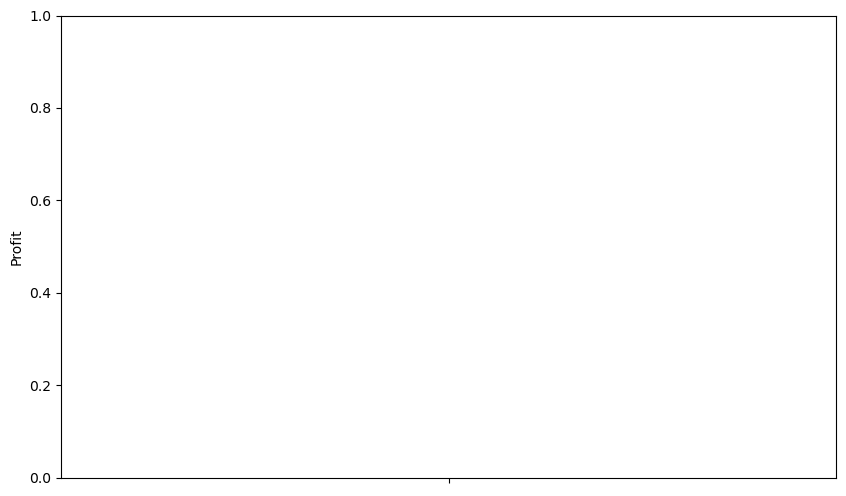

Number of potential outliers in 'Profit': 0
No potential outliers detected in the 'Profit' column.


In [447]:
# Step 1: Visualize 'Profit' column with a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Profit', color='skyblue')
# plt.title('Box Plot of Profit')
# plt.ylabel('Profit')
plt.show()

# Step 2: Calculate IQR for 'Profit'
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Calculate outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Identify potential outliers
outliers = df[(df['Profit'] < lower_bound) | (df['Profit'] > upper_bound)]

# Step 5: Summarize outliers
print(f"Number of potential outliers in 'Profit': {len(outliers)}")
if not outliers.empty:
    display(outliers[['Profit']])
else:
    print("No potential outliers detected in the 'Profit' column.")


# Advanced
## 1. Use a clustering algorithm (e.g., K-Means) to segment customers based on their purchase behavior. 


In [460]:
# As there are no features like ['Total Purchase', 'Frequency', 'Average Purchase Value'],
# But still we can create them based on customer, sales, count of orders

In [458]:
df['Customer Name'].value_counts()

William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Lela Donovan            1
Anthony O'Donnell       1
Carl Jackson            1
Ricardo Emerson         1
Jocasta Rupert          1
Name: Customer Name, Length: 793, dtype: int64

In [462]:
customer_data = df.groupby('Customer Name').agg(
                    Total_Purchase = ('Sales', 'sum'),
                    Frequency = ('Customer Name', 'count'),
                    Average_Purchase_Value = ('Sales', 'mean')).reset_index()
customer_data

Customer Name  Total_Purchase  Frequency  Average_Purchase_Value
0         Aaron Bergman         886.156          6              147.692667
1         Aaron Hawkins        1744.700         11              158.609091
2        Aaron Smayling        3050.692         10              305.069200
3       Adam Bellavance        7755.620         18              430.867778
4             Adam Hart        3250.337         20              162.516850
..                  ...             ...        ...                     ...
788        Xylona Preis        2374.658         28               84.809214
789       Yana Sorensen        6720.444         12              560.037000
790      Yoseph Carroll        5454.350          8              681.793750
791    Zuschuss Carroll        8025.707         31              258.893774
792  Zuschuss Donatelli        1493.944          9              165.993778

[793 rows x 4 columns]

In [463]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [465]:
customer_data = customer_data[['Total_Purchase', 'Frequency', 'Average_Purchase_Value']]
scalar = StandardScaler()
scaled_data = scalar.fit_transform(customer_data)
scaled_data

array([[-0.76539139, -1.05837074, -0.42148271],
       [-0.43857753, -0.25691161, -0.36409505],
       [ 0.05856216, -0.41720344,  0.40584596],
       ...,
       [ 0.97354003, -0.73778709,  2.38628746],
       [ 1.9523543 ,  2.9489249 ,  0.16310167],
       [-0.53403045, -0.57749527, -0.32527374]])

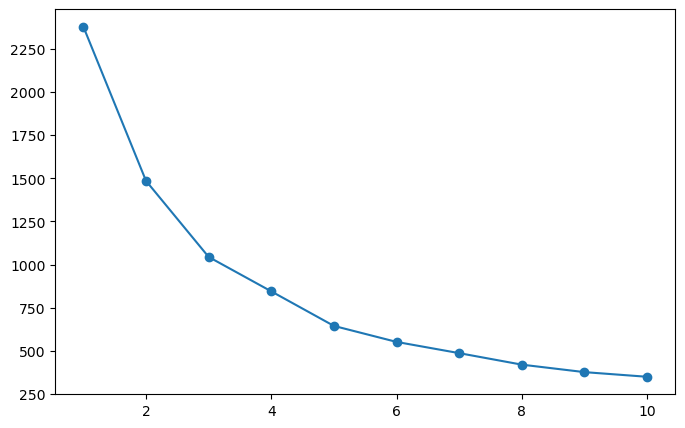

In [468]:
inertia = []
K = range(1,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
plt.show()

In [469]:
# checking for k value
from gap_statistics import OptimalK

ModuleNotFoundError: No module named 'gap_statistics'

In [474]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
customer_data['Cluster'] = clusters
customer_data

Total_Purchase  Frequency  Average_Purchase_Value  Cluster
0           886.156          6              147.692667        1
1          1744.700         11              158.609091        1
2          3050.692         10              305.069200        0
3          7755.620         18              430.867778        0
4          3250.337         20              162.516850        2
..              ...        ...                     ...      ...
788        2374.658         28               84.809214        2
789        6720.444         12              560.037000        0
790        5454.350          8              681.793750        0
791        8025.707         31              258.893774        2
792        1493.944          9              165.993778        1

[793 rows x 4 columns]

In [476]:
features = ['Total_Purchase', 'Frequency', 'Average_Purchase_Value']
cluster_summary = customer_data.groupby('Cluster')[features].mean().reset_index()
cluster_summary

Cluster  Total_Purchase  Frequency  Average_Purchase_Value
0        0     4136.384296  10.993750              391.772453
1        1     1254.734363   9.070905              138.275760
2        2     4035.899443  20.663265              194.947312
3        3    11827.025982  16.964286              830.407258

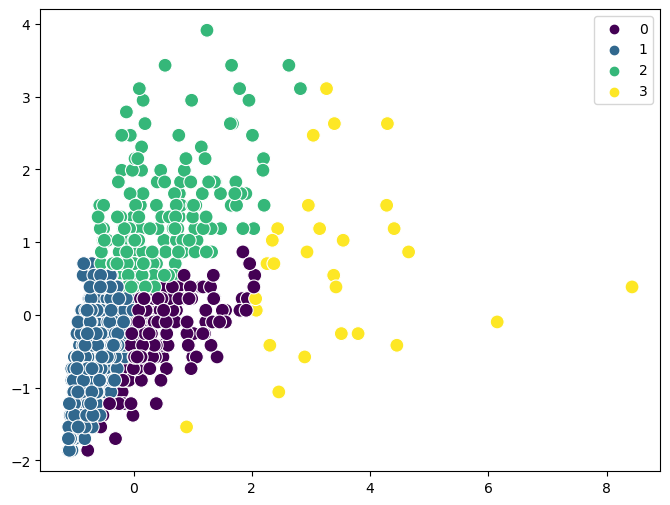

In [478]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_data[:, 0], 
    y=scaled_data[:, 1], 
    hue=clusters, 
    palette='viridis', 
    s=100
)
# plt.title('Customer Segments')
# plt.xlabel(features[0])
# plt.ylabel(features[1])
# plt.legend(title="Cluster")
plt.show()

### 3. Develop a predictive model to forecast monthly sales for the next 12 months using aggregated sales data instead of individual transactions. 

In [480]:
monthly_orders

Order_Count       Date
Date                              
2014-01-01          131 2014-01-01
2014-02-01           86 2014-02-01
2014-03-01          168 2014-03-01
2014-04-01          121 2014-04-01
2014-05-01          148 2014-05-01
2014-06-01          137 2014-06-01
2014-07-01          156 2014-07-01
2014-08-01          150 2014-08-01
2014-09-01          239 2014-09-01
2014-10-01          145 2014-10-01
2014-11-01          263 2014-11-01
2014-12-01          249 2014-12-01
2015-01-01           86 2015-01-01
2015-02-01          102 2015-02-01
2015-03-01          154 2015-03-01
2015-04-01          159 2015-04-01
2015-05-01          177 2015-05-01
2015-06-01          152 2015-06-01
2015-07-01          132 2015-07-01
2015-08-01          178 2015-08-01
2015-09-01          278 2015-09-01
2015-10-01          155 2015-10-01
2015-11-01          282 2015-11-01
2015-12-01          247 2015-12-01
2016-01-01          154 2016-01-01
2016-02-01          126 2016-02-01
2016-03-01          193 2016-03-01
2016-04-01          188 2016-04-01
2016-05-01          260 2016-05-01
2016-06-01          189 2016-06-01
2016-07-01          208 2016-07-01
2016-08-01          237 2016-08-01
2016-09-01          236 2016-09-01
2016-10-01          236 2016-10-01
2016-11-01          293 2016-11-01
2016-12-01          267 2016-12-01
2017-01-01          226 2017-01-01
2017-02-01          234 2017-02-01
2017-03-01          304 2017-03-01
2017-04-01          229 2017-04-01
2017-05-01          241 2017-05-01
2017-06-01          229 2017-06-01
2017-07-01          244 2017-07-01
2017-08-01          251 2017-08-01
2017-09-01          385 2017-09-01
2017-10-01          272 2017-10-01
2017-11-01          375 2017-11-01
2017-12-01          322 2017-12-01

In [640]:
# monthly_orders['Date'] = pd.to_datetime(monthly_orders[['Year', 'Month']].assign(Day=1))

In [641]:
# monthly_orders.drop(['Year', 'Month'], axis=1, inplace=True)
# monthly_orders

In [483]:
monthly_orders.set_index(monthly_orders["Date"], inplace=True)

In [484]:
monthly_orders.drop('Date',axis=1)

Order_Count
Date                   
2014-01-01          131
2014-02-01           86
2014-03-01          168
2014-04-01          121
2014-05-01          148
2014-06-01          137
2014-07-01          156
2014-08-01          150
2014-09-01          239
2014-10-01          145
2014-11-01          263
2014-12-01          249
2015-01-01           86
2015-02-01          102
2015-03-01          154
2015-04-01          159
2015-05-01          177
2015-06-01          152
2015-07-01          132
2015-08-01          178
2015-09-01          278
2015-10-01          155
2015-11-01          282
2015-12-01          247
2016-01-01          154
2016-02-01          126
2016-03-01          193
2016-04-01          188
2016-05-01          260
2016-06-01          189
2016-07-01          208
2016-08-01          237
2016-09-01          236
2016-10-01          236
2016-11-01          293
2016-12-01          267
2017-01-01          226
2017-02-01          234
2017-03-01          304
2017-04-01          229
2017-05-01          241
2017-06-01          229
2017-07-01          244
2017-08-01          251
2017-09-01          385
2017-10-01          272
2017-11-01          375
2017-12-01          322

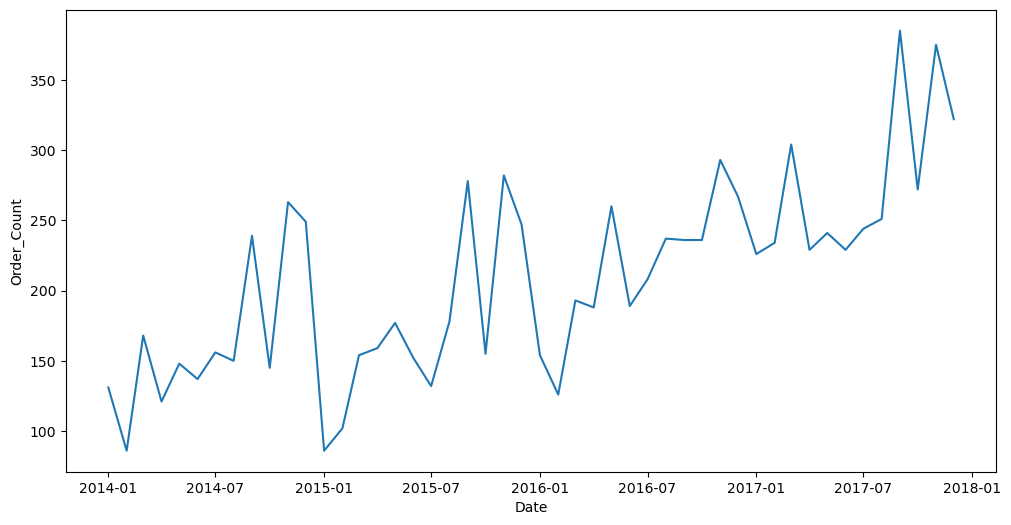

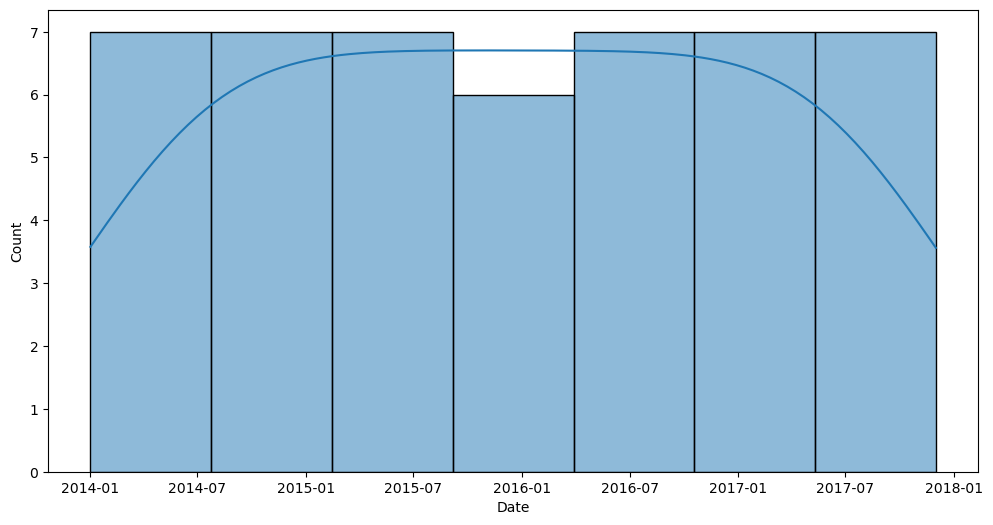

In [485]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_orders, x = monthly_orders.index, y = 'Order_Count', markers='o')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(data=monthly_orders, x= monthly_orders.index, palette='viridis', kde=True)
plt.show()

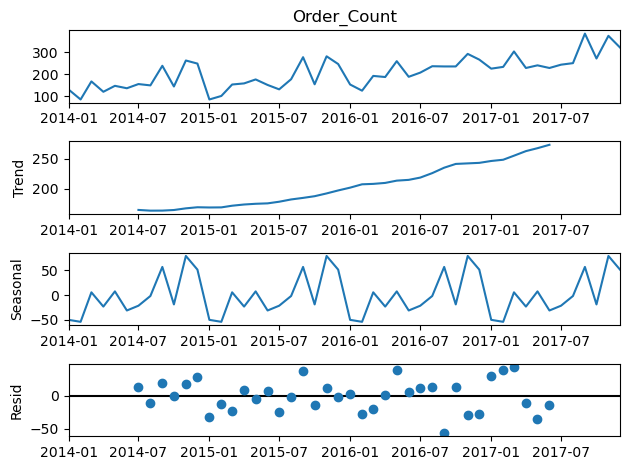

In [486]:
decompose_ts_monthly = seasonal_decompose(monthly_orders['Order_Count'])
decompose_ts_monthly.plot()
plt.show()

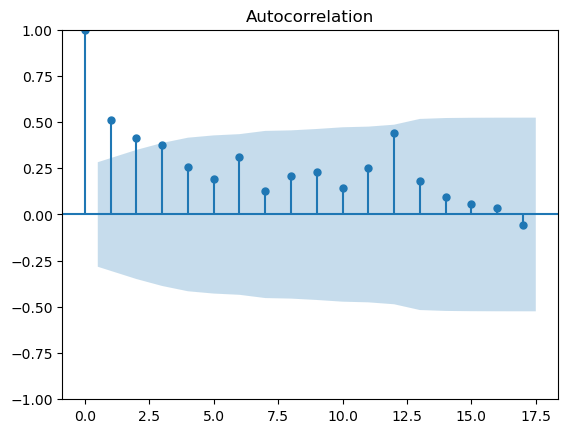

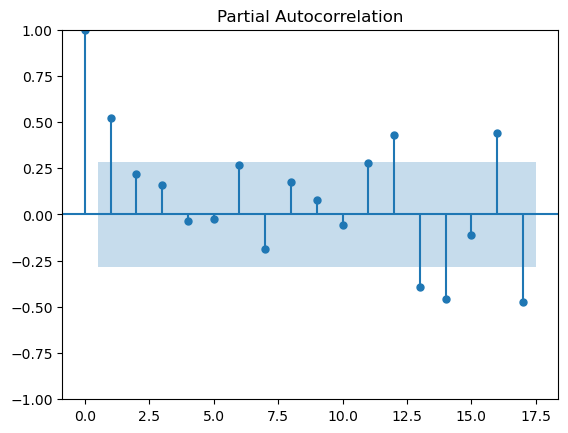

In [487]:
# Stationarity checking
import warnings
warnings.filterwarnings('ignore')
plot_acf(monthly_orders['Order_Count'].dropna())
plot_pacf(monthly_orders['Order_Count'].dropna())
plt.show()

In [488]:
adfuller_test(monthly_orders['Order_Count'])

ADF test statistic : -3.5612905688493486
P-value : 0.006545680153659592
#Lags used : 0
No. of obsrvations used : 47
Reject H0 Hypothesis (Accept H1(Alternate) Hypothesis)The Data is Stationary


In [489]:
len(monthly_orders)

48

In [490]:
monthly_train = monthly_orders[:-8]
monthly_test = monthly_orders[-8:]

In [491]:
monthly_train, monthly_test

(            Order_Count       Date
 Date                              
 2014-01-01          131 2014-01-01
 2014-02-01           86 2014-02-01
 2014-03-01          168 2014-03-01
 2014-04-01          121 2014-04-01
 2014-05-01          148 2014-05-01
 2014-06-01          137 2014-06-01
 2014-07-01          156 2014-07-01
 2014-08-01          150 2014-08-01
 2014-09-01          239 2014-09-01
 2014-10-01          145 2014-10-01
 2014-11-01          263 2014-11-01
 2014-12-01          249 2014-12-01
 2015-01-01           86 2015-01-01
 2015-02-01          102 2015-02-01
 2015-03-01          154 2015-03-01
 2015-04-01          159 2015-04-01
 2015-05-01          177 2015-05-01
 2015-06-01          152 2015-06-01
 2015-07-01          132 2015-07-01
 2015-08-01          178 2015-08-01
 2015-09-01          278 2015-09-01
 2015-10-01          155 2015-10-01
 2015-11-01          282 2015-11-01
 2015-12-01          247 2015-12-01
 2016-01-01          154 2016-01-01
 2016-02-01          126 201

In [492]:
monthly_arima = ARIMA(monthly_train['Order_Count'], order=(6,3,7)).fit()
monthly_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Order_Count   No. Observations:                   40
Model:                 ARIMA(6, 3, 7)   Log Likelihood                -201.915
Date:                Tue, 14 Jan 2025   AIC                            431.830
Time:                        19:01:43   BIC                            454.383
Sample:                    01-01-2014   HQIC                           439.781
                         - 04-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.3566      0.377     -6.249      0.000      -3.096      -1.617
ar.L2         -3.6818      0.835     -4.411      0.000      -5.318      -2.046
ar.L3         -3.9513      1.242     -3.181      0.001      -6.386      -1.516
ar.L4         -2.9095      1.202     -2.421      0.015      -5.265      -0.554
ar.L5         -1.5464      0.759     -2.038      0.042      -3.034      -0.059
ar.L6         -0.2630      0.334     -0.787      0.431      -0.918       0.392
ma.L1          0.1620      1.239      0.131      0.896      -2.267       2.591
ma.L2         -0.0532      2.211     -0.024      0.981      -4.386       4.280
ma.L3         -1.1105      8.723     -0.127      0.899     -18.207      15.986
ma.L4         -1.1094      9.029     -0.123      0.902     -18.805      16.586
ma.L5         -0.0515      2.066     -0.025      0.980      -4.101       3.998
ma.L6          0.1683      1.847      0.091      0.927      -3.453       3.789
ma.L7          0.9946      0.329      3.025      0.002       0.350       1.639
sigma2      1208.4079      0.009   1.31e+05      0.000    1208.390    1208.426
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.35
Prob(Q):                              0.72   Prob(JB):                         0.31
Heteroskedasticity (H):               0.45   Skew:                            -0.12
Prob(H) (two-sided):                  0.19   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.38e+22. Standard errors may be unstable.
"""

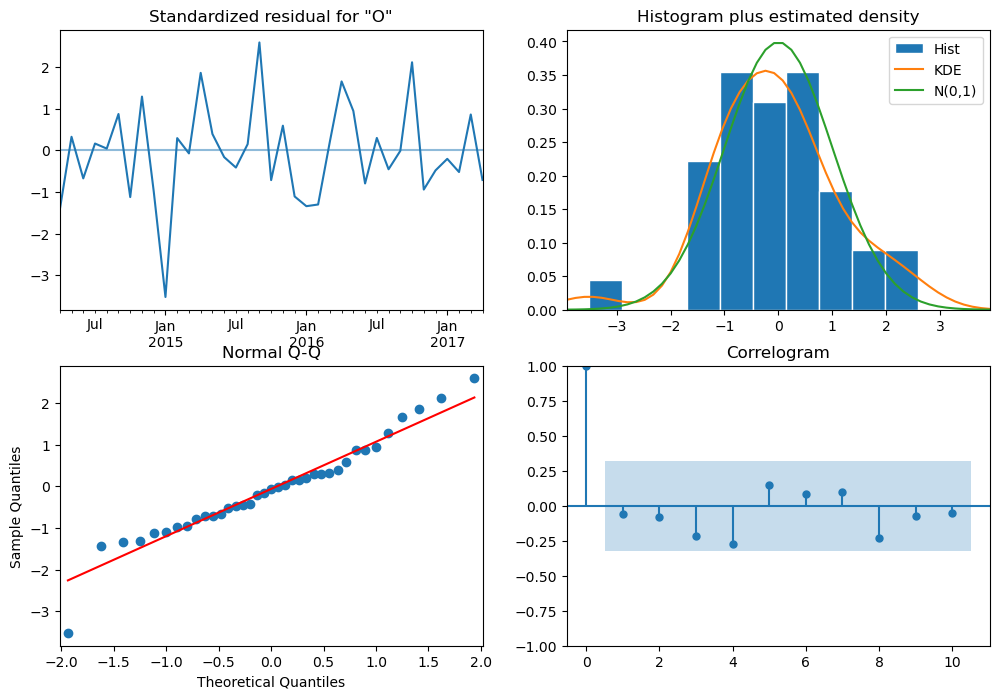

In [493]:
monthly_arima.plot_diagnostics(figsize=(12,8))
plt.show()

In [494]:
monthly_pred_start = monthly_test.index[0]
monthly_pred_end = monthly_test.index[-1]
print(monthly_pred_start)
print(monthly_pred_end)

2017-05-01 00:00:00
2017-12-01 00:00:00


In [753]:
monthly_arima_pred = monthly_arima.predict(start = monthly_pred_start, end = monthly_pred_end)
arima_resids = monthly_test['Order_Count'] - monthly_arima_pred
pd.DataFrame({'Order Count': monthly_test['Order_Count'], 'ARIMA Predicted': monthly_arima_pred, 'ARIMA Residuals': resids})

Order Count  ARIMA Predicted  ARIMA Residuals
2017-05-01          241       285.020771       -44.020771
2017-06-01          229       236.064511        -7.064511
2017-07-01          244       264.854025       -20.854025
2017-08-01          251       301.052350       -50.052350
2017-09-01          385       273.312394       111.687606
2017-10-01          272       225.267848        46.732152
2017-11-01          375       333.310982        41.689018
2017-12-01          322       287.187612        34.812388

In [765]:
# plt.figure(figsize=(12,6))
# monthly_orders['Order_Count'].plot()
# monthly_arima_pred.plot()
fig = go.Figure()

# actual values
fig.add_traces(go.Scatter(
    x = monthly_orders.index,
    y = monthly_orders['Order_Count'],
    mode = 'lines',
    name = 'Actual',
    line = dict(color = 'blue')))

# predicted values
fig.add_traces(go.Scatter(
    x = monthly_arima_pred.index,
    y = monthly_arima_pred.values,
    mode = 'lines',
    name = 'Predicted',
    line = dict(color = 'orange')))

# update layout
fig.update_layout(
    title = 'ARIMA Model: Actual vs Predicted',
    xaxis_title = 'Date',
    yaxis_title = 'Order Count',
    template = 'plotly_white',
    width = 1000,
    height = 500)



fig.show()

In [758]:
# resids.plot(kind='kde')
import plotly.figure_factory as ff

fig = ff.create_distplot(
        [arima_resids],
        group_labels=['Residuals'],
        show_hist=False,
        show_rug=False)

fig.update_layout(
    title='Kernel Density Estimate of Residuals',
    xaxis_title='Residuals',
    yaxis_title='Density',
    template='plotly_white',
    width=800,
    height=400
)
fig.show()

In [498]:
monthly_Arima_test_mape= (np.abs(monthly_test['Order_Count']-monthly_arima_pred)/monthly_test['Order_Count']).mean()
monthly_Arima_test_rmse = np.sqrt(((monthly_test['Order_Count'] - monthly_arima_pred) ** 2).mean())
print("Monthly Arima_test_mape:",monthly_Arima_test_mape)
print("Monthly Arima_test_rmse:",monthly_Arima_test_rmse)

Monthly Arima_test_mape: 0.14744725588383734
Monthly Arima_test_rmse: 53.07513035168609


In [499]:
monthly_arima_final_model = ARIMA(monthly_orders['Order_Count'], order=(6,3,7)).fit()
monthly_future_orders = monthly_arima_final_model.predict(len(monthly_orders), len(monthly_orders)+6)
monthly_future_orders

2018-01-01    311.190829
2018-02-01    333.409023
2018-03-01    387.084244
2018-04-01    316.056221
2018-05-01    381.552252
2018-06-01    377.845263
2018-07-01    380.365846
Freq: MS, Name: predicted_mean, dtype: float64

In [746]:
train_pred = monthly_arima.predict(start = monthly_orders.index[0], end = monthly_orders.index[-1])
# plt.figure(figsize=(12,6))
# monthly_orders['Order_Count'].plot(legend=True)
# train_pred.plot(legend=True)
# monthly_future_orders.plot(legend=True)
# plt.show()
fig = go.Figure()

# actual values
fig.add_traces(go.Scatter(
    x = monthly_orders.index,
    y = monthly_orders['Order_Count'],
    mode = 'lines',
    name = 'Actual',
    line = dict(color = 'blue')))

# predicted values
fig.add_traces(go.Scatter(
    x = train_pred.index,
    y = train_pred.values,
    mode = 'lines',
    name = 'Predicted',
    line = dict(color = 'orange')))

# Forecasted values
fig.add_traces(go.Scatter(
    x = monthly_future_orders.index,
    y = monthly_future_orders.values,
    mode = 'lines',
    name = 'Forecasted Future Values',
    line = dict(color = 'green')))

# update layout
fig.update_layout(
    title = 'ARIMA Model: Actual vs Predicted vs Future Forecasted',
    xaxis_title = 'Date',
    yaxis_title = 'Order Count',
    template = 'plotly_white',
    width = 1000,
    height = 500)



fig.show()

In [549]:
### Monthly Seasonal ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Define parameter ranges
p_range = range(4, 9)
d_range = [0]
q_range = range(4, 9)
P_range = range(4, 9)
D_range = [0]
Q_range = range(4, 9)
s_range = [12]

get_seasonal_combos(p_range, d_range, q_range, P_range, D_range, Q_range, s_range)

(625,
 [{'order': (4, 0, 4), 'seasonal_order': (4, 0, 4, 12)},
  {'order': (4, 0, 4), 'seasonal_order': (4, 0, 5, 12)},
  {'order': (4, 0, 4), 'seasonal_order': (4, 0, 6, 12)},
  {'order': (4, 0, 4), 'seasonal_order': (4, 0, 7, 12)},
  {'order': (4, 0, 4), 'seasonal_order': (4, 0, 8, 12)}])

In [551]:
# Find best SARIMA models
top_models = get_best_sarimax_models(monthly_orders['Order_Count'], p_range, d_range, q_range, P_range, D_range, Q_range, s_range)

# Display top models
print("\nTop 5 SARIMA Models based on AIC:")
for aic, non_seasonal, seasonal in top_models:
    print(f"AIC: {aic:.2f}, non-seasonal: {non_seasonal}, seasonal: {seasonal}")


Evaluating model 625/625...
Current Best AIC: 40.00

Top 5 SARIMA Models based on AIC:
AIC: 40.00, non-seasonal: (4, 0, 4), seasonal: (7, 0, 4, 12)
AIC: 522.41, non-seasonal: (6, 0, 4), seasonal: (4, 0, 4, 12)
AIC: 522.81, non-seasonal: (4, 0, 5), seasonal: (4, 0, 5, 12)
AIC: 522.84, non-seasonal: (4, 0, 5), seasonal: (4, 0, 4, 12)
AIC: 523.02, non-seasonal: (7, 0, 4), seasonal: (4, 0, 4, 12)


In [604]:
monthly_sarima_model = SARIMAX(monthly_train['Order_Count'], order=(9,0,8), seasonal_order=(9,0,8,12)).fit()
# order=(6,0,9), seasonal_order=(6,0,9,12)
# order=(9,0,8), seasonal_order=(9,0,8,12)
monthly_sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        Order_Count   No. Observations:                   40
Model:             SARIMAX(9, 0, 8)x(9, 0, 8, 12)   Log Likelihood                -204.176
Date:                            Wed, 15 Jan 2025   AIC                            478.352
Time:                                    06:48:22   BIC                            537.463
Sample:                                01-01-2014   HQIC                           499.724
                                     - 04-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0570    179.664     -0.000      1.000    -352.192     352.078
ar.L2          0.0926    166.364      0.001      1.000    -325.974     326.159
ar.L3         -0.1905    242.642     -0.001      0.999    -475.760     475.379
ar.L4          0.2884    103.696      0.003      0.998    -202.951     203.528
ar.L5          0.2066     57.368      0.004      0.997    -112.233     112.646
ar.L6         -0.0992     49.183     -0.002      0.998     -96.497      96.298
ar.L7          0.1870     75.236      0.002      0.998    -147.273     147.647
ar.L8          0.0489    102.009      0.000      1.000    -199.884     199.982
ar.L9          0.4108     47.529      0.009      0.993     -92.745      93.567
ma.L1          0.3609    102.769      0.004      0.997    -201.063     201.785
ma.L2          0.1557     85.176      0.002      0.999    -166.787     167.098
ma.L3          0.4906    186.908      0.003      0.998    -365.843     366.824
ma.L4         -0.1577     25.297     -0.006      0.995     -49.738      49.423
ma.L5         -0.0774     91.772     -0.001      0.999    -179.946     179.792
ma.L6          0.2623     72.126      0.004      0.997    -141.103     141.627
ma.L7         -0.0542     34.524     -0.002      0.999     -67.719      67.611
ma.L8          0.1191     75.266      0.002      0.999    -147.400     147.638
ar.S.L12      -1.1036   2731.347     -0.000      1.000   -5354.445    5352.238
ar.S.L24      -0.0752   1524.160  -4.93e-05      1.000   -2987.374    2987.224
ar.S.L36       0.8983   4908.002      0.000      1.000   -9618.608    9620.405
ar.S.L48       1.1147   7951.840      0.000      1.000   -1.56e+04    1.56e+04
ar.S.L60       0.8069   6378.265      0.000      1.000   -1.25e+04    1.25e+04
ar.S.L72       0.3988   8647.072   4.61e-05      1.000   -1.69e+04    1.69e+04
ar.S.L84      -0.2999   7952.544  -3.77e-05      1.000   -1.56e+04    1.56e+04
ar.S.L96      -1.0264   7516.355     -0.000      1.000   -1.47e+04    1.47e+04
ar.S.L108     -0.6919   5546.089     -0.000      1.000   -1.09e+04    1.09e+04
ma.S.L12       1.0581   1.04e+04      0.000      1.000   -2.04e+04    2.04e+04
ma.S.L24       0.2707   6615.705   4.09e-05      1.000    -1.3e+04     1.3e+04
ma.S.L36       1.2105   1.16e+04      0.000      1.000   -2.27e+04    2.27e+04
ma.S.L48       2.0045   8945.363      0.000      1.000   -1.75e+04    1.75e+04
ma.S.L60       0.8327   1.41e+04   5.91e-05      1.000   -2.76e+04    2.76e+04
ma.S.L72       0.3907   6425.657   6.08e-05      1.000   -1.26e+04    1.26e+04
ma.S.L84       1.0707   1.17e+04   9.11e-05      1.000    -2.3e+04     2.3e+04
ma.S.L96       0.6663   1.21e+04    5.5e-05      1.000   -2.38e+04    2.38e+04
sigma2         4.6218   7054.423      0.001      0.999   -1.38e+04    1.38e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Ja

In [605]:
monthly_sarima_pred = monthly_sarima_model.predict(start = monthly_test.index[0], end = monthly_test.index[-1])
resids = monthly_test['Order_Count'] - monthly_sarima_pred
pd.DataFrame({'Order Count': monthly_test['Order_Count'], 'SARIMA Predicted': monthly_sarima_pred, 'SARIMA Residuals': resids})

Order Count  SARIMA Predicted  SARIMA Residuals
2017-05-01          241        282.097713        -41.097713
2017-06-01          229        222.392864          6.607136
2017-07-01          244        254.746186        -10.746186
2017-08-01          251        262.566501        -11.566501
2017-09-01          385        311.811936         73.188064
2017-10-01          272        238.844096         33.155904
2017-11-01          375        350.300230         24.699770
2017-12-01          322        321.445615          0.554385

In [736]:
monthly_sarima_model.summary()

monthly_sarima_pred = monthly_sarima_model.predict(start = monthly_test.index[0], end = monthly_test.index[-1])
resids = monthly_test['Order_Count'] - monthly_sarima_pred
pd.DataFrame({'Order Count': monthly_test['Order_Count'], 'SARIMA Predicted': monthly_sarima_pred, 'SARIMA Residuals': resids})

# plt.figure(figsize=(12,6))
# monthly_orders['Order_Count'].plot()
# monthly_sarima_pred.plot()
fig = go.Figure()

# actual values
fig.add_trace(go.Scatter(
        x = monthly_test.index,
        y = monthly_test['Order_Count'],
        mode = 'lines',
        name = 'Actual',
        line = dict(color = 'blue')))

# predicted values
fig.add_trace(go.Scatter(
        x = monthly_sarima_pred.index,
        y = monthly_sarima_pred.values,
        mode = 'lines',
        name = 'SARIMA Predicted',
        line = dict(color='orange')))

# Update layout
fig.update_layout(
    title = 'SARIMA Model: Actual vs Predicted',
    xaxis_title = 'Date',
    yaxis_title = 'Order Count',
    template = 'plotly_white',
    width = 800,
    height = 500)


fig.show()

<AxesSubplot:xlabel='Date'>

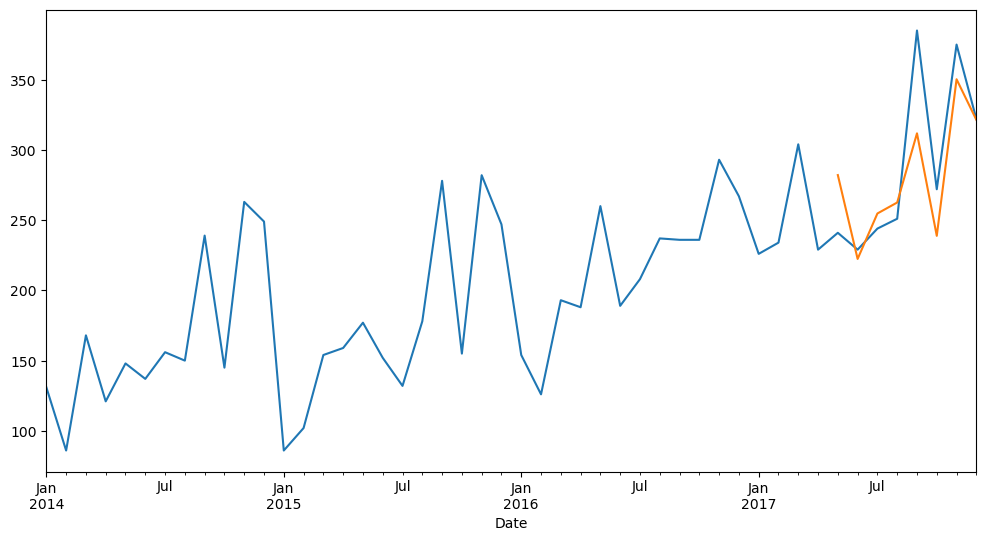

In [606]:
plt.figure(figsize=(12,6))
monthly_orders['Order_Count'].plot()
monthly_sarima_pred.plot()

In [731]:
# resids.plot(kind = 'kde')
import plotly.figure_factory as ff

# Create KDE plot with Plotly
fig = ff.create_distplot(
    [resids],  # List of residuals
    group_labels=['Residuals'],  # Name for the distribution
    show_hist=False, 
    show_rug=False   
)

# Update layout
fig.update_layout(
    title='Kernel Density Estimate of Residuals',
    xaxis_title='Residuals',
    yaxis_title='Density',
    template='plotly_white',
    width=800,
    height=400
)

# Show the plot
fig.show()


In [608]:
r2_SARIMA = r2_score(monthly_test['Order_Count'], monthly_sarima_pred)
mae_SARIMA = mean_absolute_error(monthly_test['Order_Count'], monthly_sarima_pred)
print(f'r2_SARIMA: {r2_SARIMA} & mae_SARIMA: {mae_SARIMA}' )

r2_SARIMA: 0.6692555952706305 & mae_SARIMA: 25.201957303836533


In [727]:
final_monthly_sarima = SARIMAX(monthly_orders['Order_Count'], order=(6,0,9), seasonal_order=(6,0,9,12)).fit()
monthly_sarima_forecast = final_monthly_sarima.predict(len(monthly_orders), int(len(monthly_orders))+12)
print(monthly_sarima_forecast)
# monthly_orders['Order_Count'].plot(legend = True, label = 'Original Data', figsize=(15,6))
# monthly_sarima_forecast.plot(legend = True, label = 'Future Forecasted')
# plt.show()


2018-01-01    223.950507
2018-02-01    225.617651
2018-03-01    311.525503
2018-04-01    289.046368
2018-05-01    321.662528
2018-06-01    270.714883
2018-07-01    285.744801
2018-08-01    317.610981
2018-09-01    354.312047
2018-10-01    300.912448
2018-11-01    372.091504
2018-12-01    351.763389
2019-01-01    288.014461
Freq: MS, Name: predicted_mean, dtype: float64


In [728]:
import plotly.express as px

# Prepare the original and forecast data
forecast_index = pd.date_range(
    start=monthly_orders.index[-1], 
    periods=len(monthly_sarima_forecast)+1, 
    freq='M'
)[1:]  # Skip the first duplicated date

# Combine original and forecast data
combined_data = pd.DataFrame({
    'Date': monthly_orders.index.tolist() + forecast_index.tolist(),
    'Order_Count': monthly_orders['Order_Count'].tolist() + monthly_sarima_forecast.tolist(),
    'Type': ['Original'] * len(monthly_orders) + ['Forecast'] * len(monthly_sarima_forecast)
})

# Plot using Plotly Express
fig = px.line(
    combined_data,
    x='Date',
    y='Order_Count',
    color='Type',
    title='Monthly Order Count with SARIMA Forecast',
    labels={'Order_Count': 'Order Count', 'Date': 'Date'},
    template='plotly_white'
)

# Customize layout if needed
fig.update_layout(width=900, height=500)

# Show the plot
fig.show()


In [622]:
future_df = pd.DataFrame(list(monthly_sarima_forecast.items()), columns=['Date', 'Order_Count'])
future_df['Date'] = pd.DatetimeIndex(future_df['Date'])
future_df.set_index('Date',inplace=True)
future_df

Order_Count
Date                   
2018-01-01   223.950507
2018-02-01   225.617651
2018-03-01   311.525503
2018-04-01   289.046368
2018-05-01   321.662528
2018-06-01   270.714883
2018-07-01   285.744801
2018-08-01   317.610981
2018-09-01   354.312047
2018-10-01   300.912448
2018-11-01   372.091504
2018-12-01   351.763389
2019-01-01   288.014461

In [634]:
monthly_future_df = monthly_orders.append(future_df)
monthly_future_df

Order_Count       Date
Date                              
2014-01-01   131.000000 2014-01-01
2014-02-01    86.000000 2014-02-01
2014-03-01   168.000000 2014-03-01
2014-04-01   121.000000 2014-04-01
2014-05-01   148.000000 2014-05-01
...                 ...        ...
2018-09-01   354.312047        NaT
2018-10-01   300.912448        NaT
2018-11-01   372.091504        NaT
2018-12-01   351.763389        NaT
2019-01-01   288.014461        NaT

[61 rows x 2 columns]

In [635]:
monthly_future_df.dropna(axis=1, inplace=True)

In [636]:
monthly_future_df

Order_Count
Date                   
2014-01-01   131.000000
2014-02-01    86.000000
2014-03-01   168.000000
2014-04-01   121.000000
2014-05-01   148.000000
...                 ...
2018-09-01   354.312047
2018-10-01   300.912448
2018-11-01   372.091504
2018-12-01   351.763389
2019-01-01   288.014461

[61 rows x 1 columns]

In [725]:
# monthly_future_df.plot(figsize=(15,6))
px.line(data_frame=monthly_future_df)

In [644]:
monthly_orders.drop('Date', axis=1, inplace=True)

In [722]:
# prophetmodel
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data for Prophet
prophet_data = monthly_orders.reset_index()  # Reset index to bring 'Order Date' as a column
print(prophet_data.columns)  # Check column names

# Rename columns for Prophet
prophet_data.columns = ['ds', 'y']  # Prophet requires 'ds' for dates and 'y' for the target variable

# Identify holidays (Order Count == 0)
holidays = monthly_orders[monthly_orders['Order_Count'] == 0].reset_index()

# Now use 'Order Date' (the datetime column) instead of 'index'
holidays = holidays[['Date']]  # Use 'Order Date' for the datetime column
holidays.columns = ['ds']  # Rename for Prophet
holidays['holiday'] = 'Holiday'  # Add the 'holiday' label

# Fit the Prophet Model with holidays
model = Prophet(holidays=holidays)
model.fit(prophet_data)

# Forecast for the next 30 days
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot the forecast
# fig = model.plot(forecast)
# # plt.title('Forecast of Daily Order Volume with Holidays')
# # plt.xlabel('Date')
# # plt.ylabel('Order Count')
# plt.show()

# # Optional: Plot holiday components
# fig_holidays = model.plot_components(forecast)
# plt.show()


# Create the plotly figure
fig = make_subplots(rows=1, cols=1)

# Add the actual data points
fig.add_trace(
    go.Scatter(
        x=prophet_data['ds'],
        y=prophet_data['y'],
        mode='markers',
        name='Actual Data',
        marker=dict(color='blue', size=6)
    )
)

# Add the forecast line
fig.add_trace(
    go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat'],
        mode='lines',
        name='Forecast',
        line=dict(color='green', width=2)
    )
)

# Add the confidence intervals
fig.add_trace(
    go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat_upper'],
        mode='lines',
        name='Upper Confidence Interval',
        line=dict(color='lightgreen', dash='dash')
    )
)

fig.add_trace(
    go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat_lower'],
        mode='lines',
        name='Lower Confidence Interval',
        line=dict(color='lightgreen', dash='dash')
    )
)

# Update layout
fig.update_layout(
    title='Forecast of Monthly Order Volume with Holidays',
    xaxis_title='Date',
    yaxis_title='Order Count',
    legend=dict(orientation='h'),
    template='plotly_white'
)

# Show the plot
fig.show()



11:47:52 - cmdstanpy - INFO - Chain [1] start processing


Index(['Date', 'Order_Count'], dtype='object')


11:47:52 - cmdstanpy - INFO - Chain [1] done processing


##    4. Perform feature engineering to create new variables for predicting order cancellation probabilities. 


In [691]:
df.drop('Row ID', axis = 1, inplace = True)
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Retail Sales People', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Returned', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Order_Processing_Time', 'Total_Discount',
       'Profit_Margin', 'Year', 'Month', 'Season'],
      dtype='object')

In [692]:
df.sample(10)

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
4723  CA-2016-159653 2016-05-22 2016-05-22        Same Day    JF-15490   
610   CA-2016-161816 2016-04-28 2016-04-28     First Class    NB-18655   
6861  CA-2017-128965 2017-04-17 2017-04-22  Standard Class    PS-18760   
1873  CA-2017-142888 2017-11-21 2017-11-25  Standard Class    BP-11230   
4295  CA-2017-169124 2017-03-07 2017-10-07  Standard Class    MB-17305   
701   CA-2017-114552 2017-02-09 2017-08-09  Standard Class    Dl-13600   
4022  CA-2014-154963 2014-06-22 2014-06-27  Standard Class    AA-10645   
8145  US-2014-112949 2014-06-20 2014-06-27  Standard Class    Co-12640   
585   CA-2017-145233 2017-01-12 2017-05-12  Standard Class    DV-13465   
9871  CA-2017-146269 2017-06-10 2017-06-10        Same Day    MH-17455   

           Customer Name    Segment        Country            City  \
4723        Jeremy Farry   Consumer  United States          Athens   
610            Nona Balk  Corporate  United States          Dallas   
6861        Pamela Stobb   Consumer  United States     Los Angeles   
1873  Benjamin Patterson   Consumer  United States         Spokane   
4295     Maria Bertelson   Consumer  United States  Citrus Heights   
701         Dorris liebe  Corporate  United States       Cleveland   
4022       Anna Andreadi   Consumer  United States         Chester   
8145          Corey-Lock   Consumer  United States          Lawton   
585     Dianna Vittorini   Consumer  United States          Denver   
9871       Mark Hamilton   Consumer  United States         Chicago   

             State  Postal Code   Region Retail Sales People       Product ID  \
4723       Georgia        30605    South   Cassandra Brandow  OFF-LA-10004345   
610          Texas        75217  Central      Kelly Williams  TEC-PH-10003012   
6861    California        90008     West       Anna Andreadi  OFF-LA-10003190   
1873    Washington        99207     West       Anna Andreadi  FUR-TA-10004767   
4295    California        95610     West       Anna Andreadi  FUR-FU-10001215   
701           Ohio        44105     East         Chuck Magee  FUR-FU-10002960   
4022  Pennsylvania        19013     East         Chuck Magee  FUR-CH-10000454   
8145      Oklahoma        73505  Central      Kelly Williams  OFF-AP-10001005   
585       Colorado        80219     West       Anna Andreadi  TEC-PH-10001254   
9871      Illinois        60623  Central      Kelly Williams  OFF-ST-10003208   

             Category Sub-Category  \
4723  Office Supplies       Labels   
610        Technology       Phones   
6861  Office Supplies       Labels   
1873        Furniture       Tables   
4295        Furniture  Furnishings   
701         Furniture  Furnishings   
4022        Furniture       Chairs   
8145  Office Supplies   Appliances   
585        Technology       Phones   
9871  Office Supplies      Storage   

                                           Product Name Returned    Sales  \
4723                                          Avery 493      Not   14.730   
610    Nortel Meridian M3904 Professional Digital phone      Not  369.576   
6861                                          Avery 474      Yes   23.040   
1873                               Safco Drafting Table      Yes   70.980   
4295  Howard Miller 11-1/2" Diameter Brentwood Wall ...      Not  129.390   
701          Eldon 200 Class Desk Accessories, Burgundy      Not   15.072   
4022  Hon Deluxe Fabric Upholstered Stacking Chairs,...      Not  853.930   
8145               Honeywell Quietcare HEPA Air Cleaner      Not  471.900   
585            Jabra BIZ 2300 Duo QD Duo Corded Headset      Not  406.368   
9871                 Adjustable Depth Letter/Legal Cart      Not  290.336   

      Quantity  Discount    Profit  Order_Processing_Time  Total_Discount  \
4723         3       0.0    7.2177                      0          0.0000   
610          3       0.2   41.5773                      0         73.9152   
6861         8       0.0   11.2896  

In [693]:
# Generating new features from customer
customer_features = df.groupby('Customer Name').agg(
    Total_Sales = ('Sales','sum'),
     Total_Profit = ('Profit','sum'),
     Avg_Discount = ('Discount', 'mean'),
     Order_Frequency = ('Order ID', 'count')).reset_index()
customer_features

Customer Name  Total_Sales  Total_Profit  Avg_Discount  \
0         Aaron Bergman      886.156      129.3465      0.066667   
1         Aaron Hawkins     1744.700      365.2152      0.090909   
2        Aaron Smayling     3050.692     -253.5746      0.355000   
3       Adam Bellavance     7755.620     2054.5885      0.044444   
4             Adam Hart     3250.337      281.1890      0.135000   
..                  ...          ...           ...           ...   
788        Xylona Preis     2374.658      621.2300      0.046429   
789       Yana Sorensen     6720.444     1778.2923      0.050000   
790      Yoseph Carroll     5454.350     1305.6290      0.075000   
791    Zuschuss Carroll     8025.707    -1032.1490      0.254839   
792  Zuschuss Donatelli     1493.944      249.1307      0.111111   

     Order_Frequency  
0                  6  
1                 11  
2                 10  
3                 18  
4                 20  
..               ...  
788               28  
789               12  
790                8  
791               31  
792                9  

[793 rows x 5 columns]

In [694]:
# Generating new features from order details
df['Order_Processing_Time'] = (df['Ship Date'] - df['Order Date']).dt.days

df['Total_Discount'] = df['Discount'] * df['Sales']

df['Profit_Margin'] = df['Profit'] / df['Sales']

In [695]:
# Generating new features from product details
product_features = df.groupby('Product ID').agg(
                    Product_Popularity = ('Order ID', 'count'),
                    Cancelation_Rate = ('Returned', lambda x: (x == 'Yes').sum() / len(x))).reset_index()
product_features

Product ID  Product_Popularity  Cancelation_Rate
0     FUR-BO-10000112                   1          0.000000
1     FUR-BO-10000330                   3          0.333333
2     FUR-BO-10000362                   5          0.200000
3     FUR-BO-10000468                   6          0.166667
4     FUR-BO-10000711                   2          0.000000
...               ...                 ...               ...
1857  TEC-PH-10004912                   3          0.000000
1858  TEC-PH-10004922                   5          0.200000
1859  TEC-PH-10004924                   3          0.000000
1860  TEC-PH-10004959                   2          0.000000
1861  TEC-PH-10004977                   9          0.111111

[1862 rows x 3 columns]

In [696]:
# Generating temporal features
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Season'] = df['Month'].apply(lambda x: 'Spring' if x in [3,4,5] else
                                           'Summer' if x in [6,7,8] else
                                           'Fall' if x in [9,10,11] else 'Winter')

In [697]:
df.head()

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-12-06 2016-12-06    Second Class    DV-13045   
3  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   
4  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region Retail Sales People       Product ID         Category  \
0        42420  South   Cassandra Brandow  FUR-BO-10001798        Furniture   
1        42420  South   Cassandra Brandow  FUR-CH-10000454        Furniture   
2        90036   West       Anna Andreadi  OFF-LA-10000240  Office Supplies   
3        33311  South   Cassandra Brandow  FUR-TA-10000577        Furniture   
4        33311  South   Cassandra Brandow  OFF-ST-10000760  Office Supplies   

  Sub-Category                                       Product Name Returned  \
0    Bookcases                  Bush Somerset Collection Bookcase      Not   
1       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...      Not   
2       Labels  Self-Adhesive Address Labels for Typewriters b...      Not   
3       Tables      Bretford CR4500 Series Slim Rectangular Table      Not   
4      Storage                     Eldon Fold 'N Roll Cart System      Not   

      Sales  Quantity  Discount    Profit  Order_Processing_Time  \
0  261.9600         2      0.00   41.9136                     92   
1  731.9400         3      0.00  219.5820                     92   
2   14.6200         2      0.00    6.8714                      0   
3  957.5775         5      0.45 -383.0310                      0   
4   22.3680         2      0.20    2.5164                      0   

   Total_Discount  Profit_Margin  Year  Month  Season  
0        0.000000         0.1600  2016      8  Summer  
1        0.000000         0.3000  2016      8  Summer  
2        0.000000         0.4700  2016     12  Winter  
3      430.909875        -0.4000  2015     11    Fall  
4        4.473600         0.1125  2015     11    Fall

In [698]:
final_df = df.merge(customer_features, on= 'Customer Name', how = 'left')
final_df = final_df.merge(product_features, on = 'Product ID', how = 'left')
final_df.head()

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-12-06 2016-12-06    Second Class    DV-13045   
3  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   
4  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region Retail Sales People       Product ID         Category  \
0        42420  South   Cassandra Brandow  FUR-BO-10001798        Furniture   
1        42420  South   Cassandra Brandow  FUR-CH-10000454        Furniture   
2        90036   West       Anna Andreadi  OFF-LA-10000240  Office Supplies   
3        33311  South   Cassandra Brandow  FUR-TA-10000577        Furniture   
4        33311  South   Cassandra Brandow  OFF-ST-10000760  Office Supplies   

  Sub-Category                                       Product Name Returned  \
0    Bookcases                  Bush Somerset Collection Bookcase      Not   
1       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...      Not   
2       Labels  Self-Adhesive Address Labels for Typewriters b...      Not   
3       Tables      Bretford CR4500 Series Slim Rectangular Table      Not   
4      Storage                     Eldon Fold 'N Roll Cart System      Not   

      Sales  Quantity  Discount    Profit  Order_Processing_Time  \
0  261.9600         2      0.00   41.9136                     92   
1  731.9400         3      0.00  219.5820                     92   
2   14.6200         2      0.00    6.8714                      0   
3  957.5775         5      0.45 -383.0310                      0   
4   22.3680         2      0.20    2.5164                      0   

   Total_Discount  Profit_Margin  Year  Month  Season  Total_Sales  \
0        0.000000         0.1600  2016      8  Summer    1148.7800   
1        0.000000         0.3000  2016      8  Summer    1148.7800   
2        0.000000         0.4700  2016     12  Winter    1119.4830   
3      430.909875        -0.4000  2015     11    Fall    2602.5755   
4        4.473600         0.1125  2015     11    Fall    2602.5755   

   Total_Profit  Avg_Discount  Order_Frequency  Product_Popularity  \
0      169.9344      0.200000                5                   4   
1      169.9344      0.200000                5                  12   
2     -427.1840      0.172222                9                   7   
3      -81.0858      0.136667               15                   8   
4      -81.0858      0.136667               15                   5   

   Cancelation_Rate  
0             0.000  
1             0.000  
2             0.000  
3             0.125  
4             0.000

##    5. Create an interactive visualization to analyze customer retention rates by cohorts. 


In [704]:
final_df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Retail Sales People', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Returned', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Order_Processing_Time', 'Total_Discount',
       'Profit_Margin', 'Year', 'Month', 'Season', 'Total_Sales',
       'Total_Profit', 'Avg_Discount', 'Order_Frequency', 'Product_Popularity',
       'Cancelation_Rate'],
      dtype='object')

In [706]:
final_df['First_Purchase_Month'] = final_df.groupby('Customer ID')['Order Date'].transform(min).dt.to_period('M')
final_df['Cohort'] = final_df['First_Purchase_Month']
final_df.head()

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-12-06 2016-12-06    Second Class    DV-13045   
3  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   
4  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region Retail Sales People       Product ID         Category  \
0        42420  South   Cassandra Brandow  FUR-BO-10001798        Furniture   
1        42420  South   Cassandra Brandow  FUR-CH-10000454        Furniture   
2        90036   West       Anna Andreadi  OFF-LA-10000240  Office Supplies   
3        33311  South   Cassandra Brandow  FUR-TA-10000577        Furniture   
4        33311  South   Cassandra Brandow  OFF-ST-10000760  Office Supplies   

  Sub-Category                                       Product Name Returned  \
0    Bookcases                  Bush Somerset Collection Bookcase      Not   
1       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...      Not   
2       Labels  Self-Adhesive Address Labels for Typewriters b...      Not   
3       Tables      Bretford CR4500 Series Slim Rectangular Table      Not   
4      Storage                     Eldon Fold 'N Roll Cart System      Not   

      Sales  Quantity  Discount    Profit  Order_Processing_Time  \
0  261.9600         2      0.00   41.9136                     92   
1  731.9400         3      0.00  219.5820                     92   
2   14.6200         2      0.00    6.8714                      0   
3  957.5775         5      0.45 -383.0310                      0   
4   22.3680         2      0.20    2.5164                      0   

   Total_Discount  Profit_Margin  Year  Month  Season  Total_Sales  \
0        0.000000         0.1600  2016      8  Summer    1148.7800   
1        0.000000         0.3000  2016      8  Summer    1148.7800   
2        0.000000         0.4700  2016     12  Winter    1119.4830   
3      430.909875        -0.4000  2015     11    Fall    2602.5755   
4        4.473600         0.1125  2015     11    Fall    2602.5755   

   Total_Profit  Avg_Discount  Order_Frequency  Product_Popularity  \
0      169.9344      0.200000                5                   4   
1      169.9344      0.200000                5                  12   
2     -427.1840      0.172222                9                   7   
3      -81.0858      0.136667               15                   8   
4      -81.0858      0.136667               15                   5   

   Cancelation_Rate First_Purchase_Month   Cohort  
0             0.000              2015-10  2015-10  
1             0.000              2015-10  2015-10  
2             0.000              2016-09  2016-09  
3             0.125              2015-04  2015-04  
4             0.000              2015-04  2015-04

In [710]:
cohort_data = final_df.groupby(['Cohort', 'Month'])['Customer ID'].nunique().reset_index()
cohort_data

Cohort  Month  Customer ID
0    2014-01      1           57
1    2014-01      2           10
2    2014-01      3           32
3    2014-01      4           20
4    2014-01      5           26
..       ...    ...          ...
388  2017-05     11            1
389  2017-06      6            1
390  2017-08      8            1
391  2017-09      9            1
392  2017-10     10            3

[393 rows x 3 columns]

In [711]:
cohort_pivot = cohort_data.pivot(index='Cohort', columns='Month', values='Customer ID')
cohort_pivot

Month      1     2     3     4     5     6     7     8     9     10    11  \
Cohort                                                                      
2014-01  57.0  10.0  32.0  20.0  26.0  25.0  24.0  24.0  31.0  18.0  32.0   
2014-02  11.0  45.0  18.0  15.0  21.0  16.0  23.0  18.0  18.0  27.0  20.0   
2014-03  15.0   7.0  66.0  27.0  30.0  23.0  28.0  22.0  28.0  22.0  35.0   
2014-04  14.0  10.0  18.0  43.0  15.0  17.0  13.0  15.0  22.0  15.0  26.0   
2014-05  14.0  13.0  13.0  20.0  62.0  23.0  20.0  22.0  33.0  19.0  36.0   
2014-06   8.0  14.0  12.0  14.0  21.0  49.0  16.0  20.0  24.0  20.0  33.0   
2014-07  15.0  15.0   9.0  12.0  11.0  14.0  39.0  17.0  24.0  12.0  17.0   
2014-08  10.0  11.0  15.0  15.0  14.0  16.0  16.0  45.0  21.0  18.0  24.0   
2014-09  16.0  10.0  21.0  15.0  17.0  10.0  17.0  21.0  52.0  22.0  21.0   
2014-10  11.0   9.0  16.0  11.0  16.0  19.0  13.0  14.0  23.0  40.0  22.0   
2014-11  10.0  15.0  13.0  15.0  15.0  15.0  17.0  15.0  24.0  21.0  53.0   
2014-12   9.0  13.0  13.0  13.0  15.0  15.0  15.0  16.0  17.0  14.0  16.0   
2015-01  11.0   3.0   6.0   3.0   3.0   3.0   1.0   2.0   2.0   5.0   3.0   
2015-02   2.0  12.0   4.0   4.0   3.0   2.0   4.0   3.0   6.0   2.0   6.0   
2015-03   3.0   5.0  15.0   4.0   6.0   4.0   3.0   5.0   7.0   4.0   5.0   
2015-04   2.0   5.0   2.0  15.0   2.0   4.0   4.0   5.0   7.0   7.0   7.0   
2015-05   2.0   3.0   6.0   5.0  15.0   4.0   3.0   6.0   8.0   4.0   6.0   
2015-06   2.0   2.0   3.0   2.0   3.0  12.0   3.0   5.0   6.0   8.0   6.0   
2015-07   2.0   2.0   1.0   4.0   1.0   1.0  10.0   6.0   4.0   2.0   5.0   
2015-08   2.0   2.0   2.0   3.0   NaN   3.0   1.0  10.0   5.0   1.0   4.0   
2015-09   5.0   5.0   8.0   6.0   3.0   5.0   4.0   8.0  16.0   5.0   9.0   
2015-10   3.0   1.0   2.0   2.0   1.0   NaN   4.0   1.0   2.0   7.0   2.0   
2015-11   NaN   NaN   1.0   1.0   1.0   1.0   NaN   1.0   1.0   1.0   5.0   
2015-12   2.0   NaN   1.0   3.0   1.0   1.0   2.0   2.0   1.0   2.0   2.0   
2016-01   7.0   3.0   2.0   1.0   4.0   2.0   2.0   3.0   3.0   1.0   2.0   
2016-02   2.0   2.0   1.0   NaN   1.0   2.0   NaN   1.0   NaN   1.0   1.0   
2016-03   3.0   3.0  10.0   4.0   4.0   2.0   4.0   2.0   2.0   4.0   3.0   
2016-04   2.0   NaN   1.0   8.0   1.0   1.0   2.0   1.0   3.0   3.0   3.0   
2016-05   1.0   NaN   1.0   1.0   4.0   1.0   1.0   1.0   1.0   2.0   2.0   
2016-06   NaN   1.0   2.0   NaN   NaN   4.0   NaN   2.0   1.0   NaN   1.0   
2016-07   1.0   NaN   NaN   1.0   NaN   NaN   4.0   NaN   1.0   1.0   2.0   
2016-08   1.0   NaN   NaN   1.0   1.0   NaN   NaN   2.0   1.0   1.0   1.0   
2016-09   NaN   NaN   NaN   1.0   NaN   1.0   NaN   NaN   1.0   NaN   1.0   
2016-10   NaN   1.0   1.0   1.0   NaN   NaN   NaN   1.0   2.0   2.0   1.0   
2016-11   1.0   NaN   1.0   1.0   NaN   1.0   NaN   1.0   NaN   NaN   6.0   
2016-12   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-01   1.0   NaN   1.0   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   
2017-03   NaN   NaN   3.0   1.0   NaN   NaN   1.0   1.0   NaN   NaN   NaN   
2017-05   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   1.0   
2017-06   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   
2017-08   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   
2017-09   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   
2017-10   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN   

Month      12  
Cohort         
2014-01  28.0  
2014-02  23.0  
2014-03  37.0  
2014-04  20.0  
2014-05  28.0  
2014-06  24.0  
2014-07  19.0  
2014-08  23.0  
2014-09  24.0  
2014-10  19.0  
2014-11  31.0  
2014-12  44.0  
2015-01   3.0  
2015-02   2.0  
2015-03   7.0  
2015-04   6.0  
2015-05   6.0  
2015-06   5.0  
2015-07   3.0  
2015-08   6.0  
2015-09   6.0  
2015-10   3.0  
2015-11   2.0  
2015-12   8.0  
2016-01   3.0  
2016-02   1.0  
2016-03   4.0  
2016-04   2.0  
2016-05   1.0  
2016-06   NaN  
2016-07   1.0  
2016-0

In [713]:
# Calculate retention rates: divide each cohort size by the cohort's first month
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention_matrix

Month     1         2         3         4         5         6         7   \
Cohort                                                                     
2014-01  1.0  0.175439  0.561404  0.350877  0.456140  0.438596  0.421053   
2014-02  1.0  4.090909  1.636364  1.363636  1.909091  1.454545  2.090909   
2014-03  1.0  0.466667  4.400000  1.800000  2.000000  1.533333  1.866667   
2014-04  1.0  0.714286  1.285714  3.071429  1.071429  1.214286  0.928571   
2014-05  1.0  0.928571  0.928571  1.428571  4.428571  1.642857  1.428571   
2014-06  1.0  1.750000  1.500000  1.750000  2.625000  6.125000  2.000000   
2014-07  1.0  1.000000  0.600000  0.800000  0.733333  0.933333  2.600000   
2014-08  1.0  1.100000  1.500000  1.500000  1.400000  1.600000  1.600000   
2014-09  1.0  0.625000  1.312500  0.937500  1.062500  0.625000  1.062500   
2014-10  1.0  0.818182  1.454545  1.000000  1.454545  1.727273  1.181818   
2014-11  1.0  1.500000  1.300000  1.500000  1.500000  1.500000  1.700000   
2014-12  1.0  1.444444  1.444444  1.444444  1.666667  1.666667  1.666667   
2015-01  1.0  0.272727  0.545455  0.272727  0.272727  0.272727  0.090909   
2015-02  1.0  6.000000  2.000000  2.000000  1.500000  1.000000  2.000000   
2015-03  1.0  1.666667  5.000000  1.333333  2.000000  1.333333  1.000000   
2015-04  1.0  2.500000  1.000000  7.500000  1.000000  2.000000  2.000000   
2015-05  1.0  1.500000  3.000000  2.500000  7.500000  2.000000  1.500000   
2015-06  1.0  1.000000  1.500000  1.000000  1.500000  6.000000  1.500000   
2015-07  1.0  1.000000  0.500000  2.000000  0.500000  0.500000  5.000000   
2015-08  1.0  1.000000  1.000000  1.500000       NaN  1.500000  0.500000   
2015-09  1.0  1.000000  1.600000  1.200000  0.600000  1.000000  0.800000   
2015-10  1.0  0.333333  0.666667  0.666667  0.333333       NaN  1.333333   
2015-11  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2015-12  1.0       NaN  0.500000  1.500000  0.500000  0.500000  1.000000   
2016-01  1.0  0.428571  0.285714  0.142857  0.571429  0.285714  0.285714   
2016-02  1.0  1.000000  0.500000       NaN  0.500000  1.000000       NaN   
2016-03  1.0  1.000000  3.333333  1.333333  1.333333  0.666667  1.333333   
2016-04  1.0       NaN  0.500000  4.000000  0.500000  0.500000  1.000000   
2016-05  1.0       NaN  1.000000  1.000000  4.000000  1.000000  1.000000   
2016-06  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2016-07  1.0       NaN       NaN  1.000000       NaN       NaN  4.000000   
2016-08  1.0       NaN       NaN  1.000000  1.000000       NaN       NaN   
2016-09  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2016-10  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2016-11  1.0       NaN  1.000000  1.000000       NaN  1.000000       NaN   
2016-12  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01  1.0       NaN  1.000000       NaN       NaN  1.000000       NaN   
2017-03  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2017-05  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2017-06  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2017-08  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2017-09  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2017-10  NaN       NaN       NaN       NaN       NaN       NaN       NaN   

Month          8         9         10        11        12  
Cohort                                                     
2014-01  0.421053  0.543860  0.315789  0.561404  0.491228  
2014-02  1.636364  1.636364  2.454545  1.818182  2.090909  
2014-03  1.466667  1.866667  1.466667  2.333333  2.466667  
2014-04  1.071429  1.571429  1.071429  1.857143  1.428571  
2014-05  1.571429  2.357143  1.357143  2.571429  2.000000  
2014-06  2.500000  3.000000  2.500000  4.125000  3.000000  
2014-07  1.133333  1.600000  0.800000  1.133333  1.266667  
2014-08  4.500000  2.100000  1.800000  

In [718]:
# Plot the retention matrix as a heatmap


retention_matrix.index = retention_matrix.index.astype(str)

retention_matrix_fig = px.imshow(retention_matrix,
                                labels={'x': 'Month', 'y': 'cohort','color': 'Retension Rate'},
                                color_continuous_scale='RdBu',
                                text_auto=True)
fig.update_layout(title='Customer Retention by Cohorts',
                  xaxis_title='Order Month',
                  yaxis_title='Cohort (First Purchase Month)')

retention_matrix_fig.show()